In [1]:
#Needed in general
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
import ClassCOMPAS     as CC ###
import ClassFormationChannels as FC 
import coencodeVarious        as CV

import PostProcessingScripts
# import script that has formation channel classification functions:
from ClassFormationChannels_5mainchannels import * 

In [2]:
from PostProcessingScripts import * 
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
minor = AutoMinorLocator()
import math # for tan function and degrees function

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pylab as plt
import matplotlib.patches as mpatches 

# whether to test the functions given in this notebook
testing = False

# General Idea  PRINT Formation strings (includes small bugs in printing)

The formation of DCos happens through several channels
In this notebook we first figure out what the main channels are.
And we group their seeds accordingly. This uses the formation channels class
and the formation channel printing output of COMPAS.


WARNING:

During the time of these simulations
not all bugs (MS mass transfers). As it happens MS mass transfer is not important for the formation of BHs, but this data set of formation channels might be buggy for other projects such as BeXRBs or LRN.
This has been fixed since.
Furthermore this simulation did not have later introduced SN types ( (P)PISN). Future implementation of the formation channel output might change and make this notebook outdated. Note that a temporary workaround is to give a list of seeds from PPISN, and a list of seeds without PPISN to differentiate.


The formation channel output gives a line per system in the entire simulation
hence reducing /sorting such an array will possibly leave your pc in flames.

Hence we only want the channels of systems of interest
so we pass the unique seeds we are interested in.


In [ ]:
#all the counts strings and channels are sorted
#this function prints the main channels and checks what 
#percentage of all DCO=type is accounted for
def printTopXchannels(x):
    maxx = x
    i    = 0
    totalPercentage = 0.
    while i <= maxx:
        print 'Nr systems = %s'%(fc.sortedCounts[i])
        percentage = fc.sortedCounts[i] / float(np.sum(fc.sortedCounts))
        print 'pecentage of all %s' %(percentage)
        totalPercentage += percentage
        print fc.sortedStrings[i]
        i +=1
        print 'ssss ', len(fc.sortedCounts)
    print 'the above channels account for %s of all systems'  \
    %(totalPercentage)

In [ ]:
pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/'

#hdf5 name needs to be: COMPASOutput.h5

#If you want to see what steps and class attributes are set -> verbose=True
fc = FC.FormationChannels(path = pathCOMPASOutput,verbose=True)

In [ ]:
#I dont want to take the merged within Hubble time into account in the formation
#channels. meaning if we have two exactly the same channels but one mergers within 
#Hubble and one doesnt. Techinally this is two different channels.
#By adding this column to delete columns we ignore this colum.
#Same could be done for stellar types of donors etc
# fc.deleteColumns = ['merged_in_Hubble_time'] #/floor

# For DCO types I have inbuilt sorter to return seeds
# set types argument and leave seeds argument empty (or None)
#note that withinHubbleTime and optimistic argument are  only used
# when types is given, not for seeds.
#Additionally there are the following arguments with their Default:
#   withinHubbleTime=True, optimistic=False
#Not that optimistic True, or withinHubble = False does not give opposite but all systems
fc.formationChannelsSeeds(seeds=None, types='BHNS', withinHubbleTime=True, optimistic=False)


In [ ]:


Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
# print len(Data.mass1[...].squeeze())
#     print(len(Data.mass1))
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data.setCOMPASData()
if len(Data.mass1[...].squeeze()):
    print(len(Data.mass1))

SeedsHubble    = Data.seeds[Data.Hubble==True]
print(len(SeedsHubble))


SeedsBHNS = SeedsHubble

In [ ]:
#The method :
#Go index by index -> read string and group in cell below the indices
#Note some channels do exactlu the #same but one is within Hubble other not, 
#this is classified as differencce

for index in range(20):
# index = 0 #[13,18,26,30,36,40,41,45,46,48]  #[9,10,14,31,34,44] #,18,26,30,36,40,41,45,46,48] #,10,14,31,34,44]
# index = index-1
    print fc.sortedStrings[index]

    print 'I have now accounted for  %s percent', np.sum(fc.sortedCounts[0:index+1])*100 / float(np.sum(fc.sortedCounts))
    print

    
    
    

seedsInterest = []
seedsInterest.extend(fc.sortedSeeds[index])
print(seedsInterest)
# #         Get metallicity systems this works because seeds in both
# #         files are in the same order
# mask = np.in1d(Data.seeds, np.array(seedsInterest))
# mass1 = Data.mass1[mask]
# mass2 = Data.mass2[mask]
# print(mass1)
# print(mass2)
# print(len(seedsInterest))

# print(len(mass1))

In [ ]:
#The method :
#Go index by index -> read string and group in cell below the indices
#Note some channels do exactlu the #same but one is within Hubble other not, 
#this is classified as differencce
index = 0 #[13,18,26,30,36,40,41,45,46,48]  #[9,10,14,31,34,44] #,18,26,30,36,40,41,45,46,48] #,10,14,31,34,44]
# index = index-1
print fc.sortedStrings[index]

print 'I have now accounted for  %s percent', np.sum(fc.sortedCounts[0:index+1])*100 / float(np.sum(fc.sortedCounts))


# seedsInterest = []
# seedsInterest.extend(fc.sortedSeeds[index])
# #         Get metallicity systems this works because seeds in both
# #         files are in the same order
# mask = np.in1d(Data.seeds, np.array(seedsInterest))
# mass1 = Data.mass1[mask]
# mass2 = Data.mass2[mask]
# print(mass1)
# print(mass2)
# print(len(seedsInterest))

# print(len(mass1))

# START HERE TO MAKE SCATTER PLOTS

 First, obtain the formation channel seeds and percentages for each channel 

In [3]:
seedsPercentageClassic, seedsPercentageOnlyStableMT = returnSeedsPercentageClassicAndOnlyStableMT(pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/',\
                                types='BHNS',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1)
seedsClassic, percentageClassic = seedsPercentageClassic
seedsOnlyStableMT, percentageOnlyStableMT = seedsPercentageOnlyStableMT



seedsDoubleCE, percentageDoubleCE = returnSeedsPercentageDoubleCoreCEE(pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/',\
                                types='BHNS',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1)


seedsSingleCE, percentageSingleCE = returnSeedsPercentageSingleCoreCEE(pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/',\
                                types='BHNS',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1)



seedschannels = [seedsClassic, seedsOnlyStableMT, seedsSingleCE, seedsDoubleCE]

seedsOther, percentageOther = returnSeedsPercentageOther(pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/',\
                                types='BHNS',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1, channelsSeedsList=seedschannels)




dictChannelsBHNS = { 'classic':seedsClassic, \
                    'immediate CE':seedsSingleCE,\
                         'stable B no CEE':seedsOnlyStableMT, \
                     r'double-core CE':seedsDoubleCE,  \
                        'other':seedsOther\
                       }


dictPercentages = { 'classic':percentageClassic, \
                    'immediate CE':percentageSingleCE,\
                         'stable B no CEE':percentageOnlyStableMT, \
                     r'double-core CE':percentageDoubleCE,  \
                        'other':percentageOther\
                       } 

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
73825382


../../Scripts/ClassFormationChannels_5mainchannels.py:130: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[maskInterest]


('percentage Classic        = ', 65.1972061302382)
('percentage Only stable MT =  ', 5.091741036665994)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:377: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[RLOF_Z_MASK][maskInterest]


percentage double core CE channel = 3.3711537161187377
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:533: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[RLOF_Z_MASK][maskInterest]


percentage single core CE channel = 19.686301053380923
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
('percentage other channel = ', 6.653598063596118)


## Figure 3: Scatter plot of initial masses, separations and mass ratios 

In [4]:
#general path to file (which I pass to the formationChannel file later)
path = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/'
pathCOMPASOutput = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/'
#specific path to use now
path1 = path+'COMPASOutput.h5'
fdata = h5.File(path1)
print(fdata.keys())



#### Fiducial 
MODEL = 'Fiducial'




# fc = FC.FormationChannels(path = pathCOMPASOutput)
# fc.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
#Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]


print(len(SeedsHubble))

print(np.sum(Data.weight), len((Data.weight)))



DATAmetallicities = Data.metallicitySystems


stimes_weight = 200




[u'RLOF', u'commonEnvelopes', u'doubleCompactObjects', u'formationChannels', u'supernovae', u'systems']
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
1525553
(23174.234060106566, 1525553)


In [3]:
''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


    


def plotInitialMasses(ax, fc, Data, dictRank, dictList, channelLabelList, withinHubble=True):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    channelLabelList # hack for which labels to give in legend
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
    
    
    
    for z_ind, chosenMetallicity in enumerate(metallicities):
        print('now at z_ind = %s, which are Z %s'%(z_ind,metallicityLabels[z_ind]))
#         solar = 0.0142
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(dictList):
                        
#             #Get the seeds that relate to sorted indices
            seedsInterest = dictRank[Channel]
            
            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            
            if withinHubble == True:
                mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]
            maskZ = (DATAmetallicities==chosenMetallicity)

            # use the cosmic integrated weights if they exist - Coen Model
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight
            
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities >LowZ)
            
            if z_ind==0:   
                M1ZAMS = Data.m1zams[mask][maskZlow]
                M2ZAMS = Data.m2zams[mask][maskZlow]
                weights= weight[mask][maskZlow]
            elif z_ind==1:
                M1ZAMS = Data.m1zams[mask][maskZhigh]
                M2ZAMS = Data.m2zams[mask][maskZhigh]
                weights= weight[mask][maskZhigh]
#             M1ZAMS = Data.m1zams[mask][maskZ]
#             M2ZAMS = Data.m2zams[mask][maskZ]
#             weights= Data.weight[mask][maskZ]
            
  
            
            if z_ind==0: # only legendlabel in one of 2 metallicity plots

                legendlabel=Channel
            else:
                legendlabel=None
            ax[z_ind].scatter((M1ZAMS),(M2ZAMS),s=weights*stimes_weight, linewidth=0.1, \
                              c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])

            if list(M1ZAMS):
                print( len(M1ZAMS), '= # BHNS')
       
     
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
#             ax[z_ind].tick_params(which='both', width=2)
            
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
#         ax[z_ind].grid(True, which='major');

        ax[z_ind].set_xlabel(xlabel, fontsize=fs)
        
        xmin, xmax = 5,150
        ymin, ymax = 5,50
        ax[z_ind].set_xlim(xmin, xmax)
        ax[z_ind].set_ylim(ymin, ymax)  
        

        ax[z_ind].tick_params(labelsize=fs)

        
#         # ADD LINES
#         ycord_line = np.linspace(-2,3,100)
#         # plot a few coordinates:
#         xcordlist = [20,50,100]
#         for ind_cord, xcord in enumerate(xcordlist):
#             xcord_line = np.log10(xcord) * np.ones_like(ycord_line)
#             ax[z_ind].plot(xcord_line, ycord_line, c='k', lw=2, linestyle =':')
#             ax[z_ind].text(np.log10(xcord), 1.6, s=r'%s $\rm{M}_{\odot}$'%xcord, fontsize=14, \
#                            horizontalalignment='right', verticalalignment='top', rotation=90)   



        ## Add constant mass  lines 
#         ycord_line = np.linspace(10**-2,10**3,100)
#         # plot a few coordinates:
#         xcordlist = [20,80,120]
#         for ind_cord, xcord in enumerate(xcordlist):
#             xcord_line = (xcord) * np.ones_like(ycord_line)
#             ax[z_ind].plot(xcord_line, ycord_line, c='k', lw=2, linestyle =':')
#             ax[z_ind].text((xcord), 60, s=r'%s $\rm{M}_{\odot}$'%xcord, fontsize=14, \
#                            horizontalalignment='right', verticalalignment='top', rotation=90)   
        

        ## Add constant mass ratio lines 
        x_q = np.linspace(5,150) # Msun, M1 range
        # plot a few fixed mass ratios:
        qlist = [5., 3.333333334, 2., 1.]
        qtextvalue=[0.2, 0.3,  0.5, 1]
        for ind_q, qvalue in enumerate(qlist):
            y_q =  x_q / qvalue
            
            
            y_text = 45 # Msun 
            if y_text*qvalue < 150:
                x_text = y_text * qvalue 
            else: 
                x_text = 141.
                y_text = x_text / qvalue
                
            # I am calculating the angle theta for the text: (see notes on this)
            delta_y = ((y_text - ymin) / (ymax-ymin)) 
            delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
            ratio = delta_y / delta_x
            theta_angle = math.degrees(math.atan((ratio)))

            ax[z_ind].plot(x_q, y_q, c='k', lw=2, linestyle =':')
            ax[z_ind].text(x_text, y_text, s=r'$q_{\rm{i}} =$ %s '%qtextvalue[ind_q], fontsize=14, \
                           horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   
                
        
        
    

        # PLOT metallicity labels 
        if z_ind==0:
            text_Z =    r'low metallicities, '+ r'$Z_{\rm{i}} \leq Z_{\odot}/10$' # 'low metallicity \n '
        elif z_ind==1:
            text_Z =    r'high metallicities, ' + r'$Z_{\rm{i}} > Z_{\odot}/10$'  #'high metallicity \n'
        
        if PlotText == True:
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(text_Z, xy=(0.5, 1.08), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)
            
        if (LOOP == True) & (z_ind==0):
            
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model], xy=(0.042, .95),\
                         xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                        zorder=1E10)
        
        if z_ind ==0:    
            handles, labels = ax[z_ind].get_legend_handles_labels()
    
    
    return handles, labels




In [4]:
1/0.3

3.3333333333333335

In [5]:


def plotInitialqVSseparation(ax, fc, Data, dictRank, dictList, withinHubble=True):
    """
    plots the initial mass ratio and separation for the binaries. 
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
    
    for z_ind, chosenMetallicity in enumerate(metallicities):
        print('now at z_ind = %s, which are Z %s'%(z_ind,metallicityLabels[z_ind]))

        solar = 0.0142
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(dictList):
            #Get the seeds that relate to sorted indices
            seedsInterest = dictRank[Channel]
            

            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            if withinHubble == True:
                mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]
            maskZ = (DATAmetallicities==chosenMetallicity)
            
            # split in low and high metallicities
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities > LowZ)

            
            # if wanted, use the cosmic integrated weights if they exist 
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight

            
            if z_ind==0:
                M1ZAMS = Data.m1zams[mask][maskZlow]
                M2ZAMS = Data.m2zams[mask][maskZlow]
                separationInitial = Data.separationzams[mask][maskZlow]
                weights= weight[mask][maskZlow] 
            elif z_ind==1:
                M1ZAMS = Data.m1zams[mask][maskZhigh]
                M2ZAMS = Data.m2zams[mask][maskZhigh]
                separationInitial = Data.separationzams[mask][maskZhigh]
                weights= weight[mask][maskZhigh]    
            separationInitial = np.log10(separationInitial)
            qZAMS = M2ZAMS /M1ZAMS
#             M1ZAMS = Data.m1zams[mask][maskZ]
#             M2ZAMS = Data.m2zams[mask][maskZ]
#             separationInitial = Data.separationzams[mask][maskZ]
#             separationInitial = np.log10(separationInitial)
#             qZAMS = M2ZAMS /M1ZAMS
#             weights= Data.weight[mask][maskZ]


            if z_ind==0: # only legendlabel in one of 2 metallicity plots
                legendlabel=None
            else:
                legendlabel=None
            

            if len(weights):

                ax[z_ind].scatter(qZAMS,separationInitial,s=weights*stimes_weight, edgecolor ='', linewidth=0.1,\
                                 c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])
                                  

            
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
#             ax[z_ind].tick_params(which='both', width=2)
            
#         ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
#         ax[z_ind].grid(True, which='major');

        ax[z_ind].set_xlabel(xlabel, fontsize=fs)


#         ax[z_ind].grid(True)
        ax[z_ind].set_xlim(0, 1)
        ax[z_ind].set_ylim(-1.1, 2.3) 


        
#         ### 2nd axes###
#         ax2y = ax[z_ind].twinx()
        
#         ax2y.set_xlim(0,1)
#         ax2y.set_ylim(-1.1, 2) 
# #         ax2y.set_yscale('log')
#         ax2y.tick_params(labelsize=fs)
#         if z_ind==1:
#             ax2y.set_ylabel(ylabel2, fontsize=fs)           
                
        
#         ax2y.set_yticks([np.log10(0.5),np.log10(5),np.log10(50)])
#         ax2y.set_yticklabels( [r'$0.5$',r'$5$', r'$50$'] )#[        

#         ##################
        
        
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())

        # ADD separation lines
        xcord_line = np.linspace(-2,3,100)
        # plot a few coordinates:
        ycordlist = [0.5, 5, 50]
        for ind_cord, ycord in enumerate(ycordlist):
            ycord_line = np.log10(ycord) * np.ones_like(xcord_line)
            ax[z_ind].plot(xcord_line, ycord_line, c='k', lw=2, linestyle =':')
            ax[z_ind].text(0.02, np.log10(ycord), s=r' %s $\rm{AU}$'%ycord, fontsize=14, \
                           horizontalalignment='left', verticalalignment='bottom', rotation=0)         
        
#         if z_ind==0:
#             text_Z =  'aa'# r'$\leq Z__{\odot}/10$' # 'low metallicity \n '
#         elif z_ind==1:
#             text_Z = 'bb' #r'$> Z__{\odot}/10$'  #'high metallicity \n'
        
#         if PlotText == True:
#             bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#             ax[z_ind].annotate(text_Z, xy=(0.5, 1.08), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)

        
        
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#         ax[z_ind].annotate(r'%s $Z_{\rm{i}}  %s$'%(text_Z, metallicityLabels[z_ind]), xy=(0.55, 0.95), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props)
            
            
    
    return handles, labels


In [134]:
# print(dictChannelsBHNSListBolt)
# print(dictChannelsBHNSList)

# def roundAndFormat1(xxx):
#     """ changes numbers xxx into string percentages that are nice integer numbers 
#     it is a hack to make sure that numbers like 65.241 become 65, whereas numbers like 6.7 become 7
#     so its basically rounding to the nearest integer number and then formatting it nicely for legend
#     """
#     st = '{:0.2}'.format(xxx) # round
#     st = (round(float(st),0))
#     st = str(st)
#     st = ('%f' %float(st)).rstrip('0').rstrip('.') # format
#     return str(st)


legendlabel = []
for ind, key in enumerate(dictChannelsBHNSList):
    
    print(str((round(dictPercentages[key],2))) + str(r'\%'))
    string = dictChannelsBHNSListBolt[ind] + ' ' + r'$%s$'%str((roundAndFormat1(dictPercentages[key]))) + str(r'\%')
    print(string)
    legendlabel.append(string)
    
    
print(np.sum(np.asarray([65.2,5.09,19.69, 3.37,6.65])))

65.2\%
\textbf{(I) Classic} $65$\%
5.09\%
\textbf{(II) Only stable mass transfer} $5$\%
19.69\%
\textbf{(III) Single-core CE as first mass transfer} $20$\%
3.37\%
\textbf{(IV) Double-core CE as first mass transfer} $3$\%
6.65\%
\textbf{other} $7$\%
100.00000000000001


-----------------
now doing initial masses
-----------------
now at z_ind = 0, which are Z pprox 0.00142
(189581, '= # BHNS')
(5969, '= # BHNS')
(23446, '= # BHNS')
(4968, '= # BHNS')
(5373, '= # BHNS')
now at z_ind = 1, which are Z pprox solar
(1241396, '= # BHNS')
(4761, '= # BHNS')
(41065, '= # BHNS')
(5031, '= # BHNS')
(3963, '= # BHNS')
-----------------
now doing q vs separation
-----------------
now at z_ind = 0, which are Z pprox 0.00142
now at z_ind = 1, which are Z pprox solar


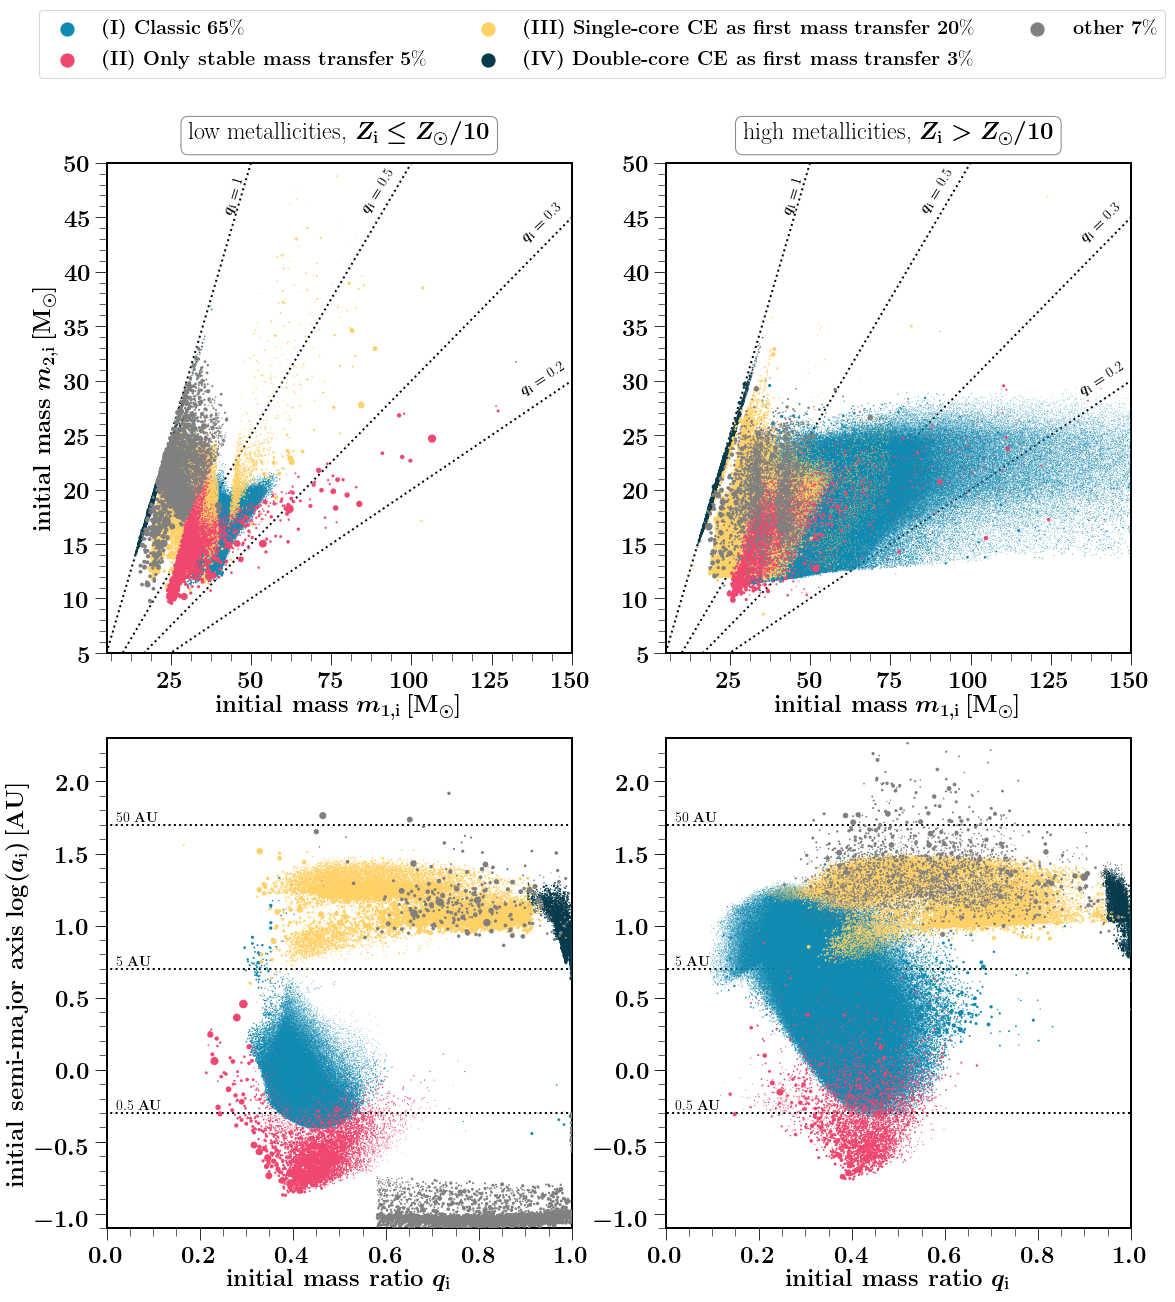

In [135]:



# Use MSSFR Integrated weights?
WeightsRateIntrinsic_zIntegrated=False
if WeightsRateIntrinsic_zIntegrated==False:
    ModelName = 'notMSSFRweighted'

stimes_weight = 25
metallicities = [0.0014,  0.01269]
metallicityLabels =  ['\approx 0.00142', '\approx solar']#['\leq Z__{\odot}/10', '> Z__{\odot}/10']


print('-----------------')
print('now doing initial masses')
print('-----------------')

f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})




#### PLOT SEPARATION AND MASS RATIO ###
# xlabel = r'\textbf{initial mass} $\log(m_{1,{\rm{i}}}) \, [\rm{M}_{\odot}]$'
# ylabel = r'\textbf{initial mass} $\log(m_{2,{\rm{i}}}) \, [\rm{M}_{\odot}]$'
xlabel = r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$'
ylabel = r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$'


PlotText = True
fc=None

handles, labels = plotInitialMasses(ax=ax[0], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList,channelLabelList=range(8), withinHubble=True)

lgd2 = f.legend(handles, legendlabel, fontsize=20, ncol=3,\
         bbox_to_anchor=(1.02, 1.13),  markerscale=3., scatterpoints=1) # loc = 'upper center')






markersize_lgd = 200
lgd2.legendHandles[0]._sizes = [markersize_lgd]
lgd2.legendHandles[1]._sizes = [markersize_lgd]
lgd2.legendHandles[2]._sizes = [markersize_lgd]
lgd2.legendHandles[3]._sizes = [markersize_lgd]
lgd2.legendHandles[4]._sizes = [markersize_lgd]



xlabel = r'\textbf{initial mass ratio} $q_{\rm{i}} $'
ylabel2 = r'\textbf{initial separation} $a_{\rm{i}} \, [\rm{AU}]$'
# ylabel = r'\textbf{initial separation} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$'
ylabel = r'\textbf{initial semi-major axis} $\log(a_{\rm{i}}) \, [\rm{AU}]$'

print('-----------------')
print('now doing q vs separation')
print('-----------------')

# f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
PlotText = False
handles, labels = plotInitialqVSseparation(ax=ax[1], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)






f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5) 
f.savefig('./BHNS_InitialParamBugFix_'+ ModelName + '.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()
plt.close()        



In [ ]:
print(0.0142/5)

# Figure 4. Plot Scatter plots separation and eccentricity 

## merger time calculation from Peters 1964 for constant merger times line 

In [6]:
def timeToCoalescenceUsingInterpolation( a0,  e0,  m1,  m2):
    """/*
     Calculate the time to coalescence for a binary with arbitrary eccentricity using interpolation
     
     This is Equation 5.14 in Peters 1964 http:#journals.aps.org/pr/pdf/10.1103/PhysRev.136.B1224

     Parameters
     -----------
     a0 : 
        Initial semi-major axis in SI units
     e0 : 
        Initial eccentricity
     m1 :  
        Primary mass in SI units
     m2 : 
        Secondary mass in SI units
     
     Returns
     --------
     t_coalesce : 
        Time to coalescence in SI units (s)

     */
    """
    # Declare some variables
    tc       = 0.0;                                          # Time for a circular binary to coalesce
    beta     = 0.0;                                          # Beta constant (function of masses)
    tovertc  = 0.0;                                          # Result of interpolation of t/tc function
    

    # Calculate circular time to coalescence
    beta = calculateBeta(m1, m2);                                   # Masses should be in SI
    tc = a0*a0*a0*a0/(4.0*beta);                                    # Calculate time for a circular binary to merge
    
    # calculate t/tc using the interpolated function
    #tovertc = polynomialFitToToverTc(e0);                           # Ratio of inspiral time to that of circular system
    if((e0==0.0)or(e0==0)):
		return	tc;

    c0=a0*(1.0-e0*e0)*np.power(e0,-12.0/19.0)*np.power(1.0+(121.0*e0*e0/304.0), -870.0/2299.0);
		
		
    if(e0<0.01): 
		return c0*c0*c0*c0*np.power(e0,48.0/19.0)/(4.0*beta);
    

    if(e0>0.99):
		# Approximation of eq. 5.14 of Peters 1964, for high eccentricities
		return (768.0/425.0)*tc*np.power((1.0-(e0*e0)),3.5);
    	
    # otherwise: numerically integrate
    summ=0;
    de=e0/10000;
    e=0
    while(e<e0):
        summ=summ+de*np.power(e,29.0/19.0)*np.power((1.0+(121.0/304.0)*e*e),1181.0/2299.0)/np.power((1-e*e),1.5);
        e=e+de

    return 12.0/19.0*c0*c0*c0*c0/beta*summ;



def calculateBeta( m1,  m2):
    """/*
     # Calculate the constant beta based on masses as defined in Equation 5.9 in Peters 1964 http:#journals.aps.org/pr/pdf/10.1103/PhysRev.136.B1224
     
     Parameters
     -----------
     m1 : float
        Primary mass in SI units
     m2 : float
        Secondary mass in SI units
     
     Returns
     --------
     beta : float
        Mass parameter beta
 
     */
     """
    M = m1 + m2;

    return (64.0/5.0)*G*G*G*m1*m2*M*np.power(c,-5.0);



In [7]:



def create_adaptive_separationArray(xstart,xend, Niter_a1, Niter_a2, Niter_a3):

    x_sep1 = np.logspace(-1.1, xstart, Niter_a1)
    x_sep2 = np.logspace(xstart*1.0001, xend, Niter_a2)
    x_sep3 = np.logspace(xend*1.0001, 3, Niter_a3)

    
    x_separation = np.concatenate((x_sep1, x_sep2))
    x_separation = np.concatenate((x_separation, x_sep3))
    
    x_separation = x_separation*u.R_sun # array of separations to try
    
    return x_separation
    




def obtain_a_and_e_for_fixed_mergerTime(x_separation, fixed_Tinsp, Niter_a, Niter_e):
    """ 
    
    fixed_Tinsp = wanted merger time in yrs
    
    """
    # constants
    M1 = 10*u.M_sun
    M2 = 1.4*u.M_sun
    c= const.c.si
    G = const.G.si
    ##
    if x_separation==None:
        x_separation = np.logspace(-1, 3, Niter_a)*u.R_sun # array of separations to try
    x_eccentricities = [] # list where we will append the solution of the eccentricities 

    emin =0
    for ind_a, sep in enumerate(x_separation):
        
        if ind_a%10==9:
            print('at iteration  ',ind_a+1 , ' of ', len(x_separation) )
        else:
            pass # do nothing and continue
        
        for ind_e, ecc in enumerate(np.linspace(emin, 1, Niter_e)):
#             solve_a = solve_a
            mergertime = timeToCoalescenceUsingInterpolation(a0=sep.to(u.meter), e0=ecc, m1=M1.to(u.kg),  m2=M2.to(u.kg)).to(u.year) # in years
            if (mergertime <= fixed_Tinsp) | (ecc==1):
                x_eccentricities.append(ecc)
                emin = ecc
#                 print(emin, sep, ' = e, a')
                break 
    
    return x_eccentricities


Niter = 1000
from astropy import units as u
from astropy import constants as const
a =10**(2)*u.R_sun
M1 = 10*u.M_sun
M2 = 1.4*u.M_sun

c= const.c.si
G = const.G.si
Niter_a, Niter_e = 20,20
t_Hubble = 13.7*u.Gyr
t_Hubble_inyears = (t_Hubble.to(u.year))
req_times_list_names = ['thousandYr' ,'oneMyr', 'oneGyr', 'tHubble' ]
BH_array = np.linspace(2.5, 20, Niter)


for ind_n, name_t in enumerate(req_times_list_names):

    TIME=name_t #'oneMyr'#'thousandYr'  #'tHubble'  #'tenMyr' #

    DEFAULT=False
    if DEFAULT==True:
        t_requested =  (1e6*u.year).to(u.year) #t_Hubble_inyears #(10*u.Myr).to(u.year) # in years
        
        
    if DEFAULT==True:
        x_separation = np.logspace(-1, 3, Niter_a)*u.R_sun # array of separations to try
        x_eccentricities = obtain_a_and_e_for_fixed_mergerTime(x_separation=x_separation, fixed_Tinsp=t_requested, Niter_a=20, Niter_e=20)




    else:
        if TIME=='tHubble':
            xstart, xend = 0.8, 1.8
            x_separation_tHubble = create_adaptive_separationArray(xstart,xend, Niter_a1=10, Niter_a2=50, Niter_a3=30)
            x_separation=x_separation_tHubble

            x_eccentricities_tHubble = obtain_a_and_e_for_fixed_mergerTime(x_separation=x_separation, fixed_Tinsp=t_Hubble_inyears, Niter_a=20, Niter_e=50)
            x_eccentricities=x_eccentricities_tHubble

        elif TIME=='oneGyr':
            t_requested = (1*u.Gyr).to(u.year)
            xstart, xend = np.log10(4), np.log10(50)


            x_separation_tGyr = create_adaptive_separationArray(xstart,xend, Niter_a1=10, Niter_a2=50, Niter_a3=30)
            x_separation=x_separation_tGyr

            x_eccentricities_tGyr = obtain_a_and_e_for_fixed_mergerTime(x_separation=x_separation, fixed_Tinsp=t_requested, Niter_a=20, Niter_e=50)
            x_eccentricities=x_eccentricities_tGyr

        elif TIME=='tenMyr':
            t_requested = (10*u.Myr).to(u.year)
            xstart, xend = np.log10(1), np.log10(20)


            x_separation_tTenMyr = create_adaptive_separationArray(xstart,xend, Niter_a1=10, Niter_a2=50, Niter_a3=30)
            x_separation=x_separation_tTenMyr

            x_eccentricities_tTenMyr = obtain_a_and_e_for_fixed_mergerTime(x_separation=x_separation, fixed_Tinsp=t_requested, Niter_a=20, Niter_e=50)
            x_eccentricities=x_eccentricities_tTenMyr        


        elif TIME=='oneMyr':
            t_requested = (1*u.Myr).to(u.year)
            xstart, xend = np.log10(.6), np.log10(4)


            x_separation_toneMyr = create_adaptive_separationArray(xstart,xend, Niter_a1=10, Niter_a2=50, Niter_a3=30)
            x_separation=x_separation_toneMyr

            x_eccentricities_toneMyr = obtain_a_and_e_for_fixed_mergerTime(x_separation=x_separation, fixed_Tinsp=t_requested, Niter_a=20, Niter_e=50)
            x_eccentricities=x_eccentricities_toneMyr  



        elif TIME=='thousandYr':
            t_requested = (1000*u.year).to(u.year)
            xstart, xend = np.log10(.101), np.log10(.6)


            x_separation_thousandYr  = create_adaptive_separationArray(xstart,xend, Niter_a1=10, Niter_a2=50, Niter_a3=30)
            x_separation=x_separation_thousandYr 

            x_eccentricities_thousandYr  = obtain_a_and_e_for_fixed_mergerTime(x_separation=x_separation, fixed_Tinsp=t_requested, Niter_a=20, Niter_e=50)
            x_eccentricities=x_eccentricities_thousandYr        


        else:
            print('error time not known')






('at iteration  ', 10, ' of ', 90)
('at iteration  ', 20, ' of ', 90)
('at iteration  ', 30, ' of ', 90)
('at iteration  ', 40, ' of ', 90)
('at iteration  ', 50, ' of ', 90)
('at iteration  ', 60, ' of ', 90)
('at iteration  ', 70, ' of ', 90)
('at iteration  ', 80, ' of ', 90)
('at iteration  ', 90, ' of ', 90)
('at iteration  ', 10, ' of ', 90)
('at iteration  ', 20, ' of ', 90)
('at iteration  ', 30, ' of ', 90)
('at iteration  ', 40, ' of ', 90)
('at iteration  ', 50, ' of ', 90)
('at iteration  ', 60, ' of ', 90)
('at iteration  ', 70, ' of ', 90)
('at iteration  ', 80, ' of ', 90)
('at iteration  ', 90, ' of ', 90)
('at iteration  ', 10, ' of ', 90)
('at iteration  ', 20, ' of ', 90)
('at iteration  ', 30, ' of ', 90)
('at iteration  ', 40, ' of ', 90)
('at iteration  ', 50, ' of ', 90)
('at iteration  ', 60, ' of ', 90)
('at iteration  ', 70, ' of ', 90)
('at iteration  ', 80, ' of ', 90)
('at iteration  ', 90, ' of ', 90)
('at iteration  ', 10, ' of ', 90)
('at iteration  ', 2

In [8]:
from astropy import units as u
from astropy import constants as const


def convert_a_to_P_circular(separation, M1, M2):
    """calculate Period from separation
    separation is separation (needs to be given in astropy units)
    M1 and M2 are masses of the binary
    
    """
    G = const.G # [gr cm s^2]
    

    mu = G*(M1+M2)
    period = 2*np.pi * np.sqrt(separation**3/mu)
    
    
    
    return period

if testing==True:
    Period = convert_a_to_P_circular(separation=1*u.Rsun, M1=1*u.Msun, M2=1*u.Msun)

    print(Period.to(u.d))

In [9]:
Period = convert_a_to_P_circular(separation=10**0*u.Rsun, M1=10*u.Msun, M2=1.4*u.Msun)
print(Period.to(u.d))

0.0343076434748 d


In [10]:



''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


# weightsSystems =  fdata['systems']['weight'][...].squeeze()

    
AUtoRsun = 214.939

def ploteVSseparation(ax, fc, Data, dictRank, dictList, withinHubble=True):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """

    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
        
    
#     print('is this 0?', weight_fast_mergers)
    for z_ind, chosenMetallicity in enumerate(metallicities):
        weight_fast_mergers, weight_all = 0,0 
        weight_fast_mergers_10, weight_fast_mergers_0_1 = 0,0
        print('now at Z = %s'%chosenMetallicity) 
        solar = 0.0142
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(dictList):
            #Get the seeds that relate to sorted indices
            seedsInterest = dictRank[Channel]
#             for index in dictRank[Channel]:
#                 seedsInterest.extend(fc.sortedSeeds[index-1])
            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]
            
#             maskZ = (DATAmetallicities==chosenMetallicity)

            
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities > LowZ)

            
            # use the cosmic integrated weights if they exist - Coen Model
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight
#             weight = Data.weight
            
            if z_ind==0:
                M1ZAMS = Data.m1zams[mask][maskZlow]
                M2ZAMS = Data.m2zams[mask][maskZlow]
                eccentricityDCOFormation=Data.eccentricityDCOFormation[mask][maskZlow]
                separationDCOFormation=Data.separationDCOFormation[mask][maskZlow]
                M1 = Data.mass1[mask][maskZlow]
                M2 = Data.mass2[mask][maskZlow]    
                separationInitial = Data.separationzams[mask][maskZlow]
                weights= weight[mask][maskZlow] 
                maskZ = maskZlow
            elif z_ind==1:
                M1ZAMS = Data.m1zams[mask][maskZhigh]
                M2ZAMS = Data.m2zams[mask][maskZhigh]
                eccentricityDCOFormation=Data.eccentricityDCOFormation[mask][maskZhigh]
                separationDCOFormation=Data.separationDCOFormation[mask][maskZhigh]
                M1 = Data.mass1[mask][maskZhigh]
                M2 = Data.mass2[mask][maskZhigh]   
                weights= weight[mask][maskZhigh] 
                maskZ = maskZhigh
  
            qZAMS = M2ZAMS /M1ZAMS
#             eccentricityDCOFormation=Data.eccentricityDCOFormation[mask][maskZ]
#             separationDCOFormation=Data.separationDCOFormation[mask][maskZ]           
            
#             M1ZAMS = Data.m1zams[mask][maskZ]
#             M2ZAMS = Data.m2zams[mask][maskZ]
#             M1 = Data.mass1[mask][maskZ]
#             M2 = Data.mass2[mask][maskZ]            
# #             separationInitial = Data.separationzams[mask][maskZ]
# #             separationInitial = np.log10(separationInitial)
#             qZAMS = M2ZAMS /M1ZAMS
#             weights= Data.weight
            
            

            
            legendlabel=None


            if len(weights):

                
                ax[z_ind].scatter((separationDCOFormation*AUtoRsun),eccentricityDCOFormation,\
                                  s=(weights*stimes_weight), edgecolor ='', linewidth=0.1,\
                                 c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])                
                
                
#                 ax[z_ind].scatter((separationDCOFormation*AUtoRsun),eccentricityDCOFormation,\
#                                   s=weights*stimes_weight, edgecolor ='', linewidth=0.1,\
#                                  c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])
        

            times = Data.tc[mask][maskZ] #Myr
            maskWithin1Myr  = (times <= 1)
            
            weight_fast_mergers += np.sum(Data.weight[mask][maskZ][maskWithin1Myr])
            weight_all += np.sum(Data.weight[mask][maskZ])

            
            
            maskWithin10Myr  = (times <= 10)
            weight_fast_mergers_10 += np.sum(Data.weight[mask][maskZ][maskWithin10Myr])
               
            maskWithin0_1Myr  = (times <= .10)
            weight_fast_mergers_0_1 += np.sum(Data.weight[mask][maskZ][maskWithin0_1Myr])            
            
        # PLOT MERGER TIME SOLVER 
        x_ecc = [x_eccentricities_toneMyr, x_eccentricities_tGyr, x_eccentricities_tHubble]
        for ind_line, x_sep in enumerate([x_separation_toneMyr, x_separation_tGyr, x_separation_tHubble]):
#             print(x_sep)
#             print(x_ecc[ind_line])
#             print('-----')
            # Hubble time line
            ax[z_ind].plot((x_sep.value), x_ecc[ind_line], lw=4, color = 'k',linestyle=':', zorder=2000)        
            
            # draw arrows (see couple of cells below for how I figured out these values)
            if ind_line==0:
                strr = r"$t_{\rm{inspiral}}=1\,\rm{Myr}$"
                x_xy, y_xy = 0.31,0.7
                x_xytext, y_xytext = 0.16, 0.90 
                conn = "arc3,rad=+0.2"

            elif ind_line==1:
                strr = r"$t_{\rm{inspiral}}=1\,\rm{Gyr}$"
                x_xy, y_xy = 0.48, 0.6
                x_xytext, y_xytext = 0.82, 0.7
                conn = "arc3,rad=-0.2"

            elif ind_line==2:
                strr = r"$t_{\rm{inspiral}}=t_{\mathcal{H}}$"
                x_xy, y_xy = 0.53, 0.4
                x_xytext, y_xytext = 0.7, 0.3  
                conn = "arc3,rad=+0.2"


            ax[z_ind].annotate(strr,
              xy=(x_xy, y_xy), xycoords='axes fraction',
              xytext=(x_xytext, y_xytext), textcoords='axes fraction',
              size=14, va="center", ha="center",
        #                   bbox=dict(boxstyle="round4", fc="w"),
              arrowprops=dict(arrowstyle="-|>",
                              connectionstyle=conn,
                              fc="k", lw=2.5), zorder=20000
                          )   
                

            
#             ax.annotate(r"$t_{\rm{inspiral}}=t_{\mathcal{H}}$", xy=(0.5, 0.5), xytext=(0, 2),
#              arrowprops=dict(arrowstyle="->"), fontsize=14)
     
        
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
            
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)

        ax[z_ind].set_xlabel(xlabel2, fontsize=fs)
        ax[z_ind].set_xscale('log')

        ax[z_ind].set_xlim(.1, 10**3)
        ax[z_ind].set_ylim(0, 1) 
        
      

    
    
        # set second axes to be the Period of a 1.4 + 10 Msun binary BH-NS
        ax2y = ax[z_ind].twiny()
        
        # calculate period for 10 Msun BH and 1.4 Msun NS 
        xx_sep = np.logspace(-1,3,1000)
        Period = convert_a_to_P_circular(separation=xx_sep*u.Rsun, M1=1.4*u.Msun, M2=10*u.Msun)
        Period = Period.to(u.d)
        ax2y.set_xlim(np.min(Period.value),np.max(Period.value))
        ax2y.set_xscale('log')

        ax2y.tick_params(labelsize=fs)
        ax2y.set_xlabel(xlabel, fontsize=fs)   
        
        
        
        
        
                
                
#         ax2y.yaxis.set_minor_locator(AutoMinorLocator())        
        
#         ax2y.set_xticks([np.log10(0.5),np.log10(1),np.log10(3),np.log10(10),np.log10(30),np.log10(1000)])
#         ax2y.set_xticklabels( [,r'$0.5$',r'$1.0$',r'$3.0$',r'$10$', r'$30$',r'$10^3$'] )#[        

        # PLOT metallicity labels 
        if z_ind==0:
            text_Z =    r'low metallicities, '+ r'$Z_{\rm{i}} \leq Z_{\odot}/10$' # 'low metallicity \n '
        elif z_ind==1:
            text_Z =    r'high metallicities, ' + r'$Z_{\rm{i}} > Z_{\odot}/10$'  #'high metallicity \n'
        
        if PlotText == True:
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(text_Z, xy=(0.5, 1.08), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)
        
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#         ax[z_ind].annotate(r'$Z = %s$'%chosenMetallicity, xy=(0.7, 0.10), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props)

        print('weights fast mergers <1Myr, all mergers =', weight_fast_mergers, weight_all)
        print('fraction fast mergers <1Myr = ' , weight_fast_mergers/weight_all, 'for Z = ', text_Z)
        print('fraction fast mergers <10Myr =' , weight_fast_mergers_10/weight_all, 'for Z = ', text_Z)
        print('fraction fast mergers <0.1Myr =', weight_fast_mergers_0_1/weight_all, 'for Z = ', text_Z)
        print()
        
        
        
        
    return handles, labels








In [11]:



def calculateRisco(m_bhtemp, Xefftemp):
    # this is prograde orbit
    # see also https://duetosymmetry.com/tool/kerr-isco-calculator/

    # everything in cgs
    c = 2.99792458E10 #[cm s-1] 
    G = 6.67259E-8   
    Msun = 1.99E33 # gr
    Rsun = 6.96E10 # cm     
    
    factorFront =   ((G*m_bhtemp)/c**2) #m_bhtemp #s
    
    Z1 = 1 + (1 - Xefftemp**2)**(1/3) * ((1 + Xefftemp)**(1/3) + (1 - Xefftemp)**(1/3) )
    Z2 = np.sqrt((3* Xefftemp**2 + Z1**2))
    
    Risco = factorFront * (3 + Z2 - np.sqrt((3-Z1)*(3+Z1 +2*Z2)))
    return Risco



def calculateEjectedMassMerger(m_ns, r_ns, m_bh, Xeff ):
 # from 1807.00011, Eq 4 
    # returns M_rem in solar masses 
    # input r and m in solar masses and R sun. Xeff in [0,1] (symmetric) 
    # RNS in km
    
    
    # everything in cgs
    c = 2.99792458E10 #[cm s-1] 
    G = 6.67259E-8   
    Msun = 1.99E33 # gr
    Rsun = 6.96E10 # cm         
    
    
    # convert to cgs
    r_ns  = r_ns*0.1*10**6 #np.asarray([1.E6]* len(m_ns)) # to cm
    m_ns_cgs = Msun * m_ns
    m_bh_cgs = Msun * m_bh
    
    
    alpha, beta, gamma, delta = 0.406, 0.139, 0.255, 1.761
    C_NS = G * m_ns_cgs / (r_ns * c**2)
    
    R_isco = calculateRisco(m_bh_cgs, Xeff)
    
    R_isco_norm  = R_isco / (m_bh_cgs * (G/c**2)) 
    
    Q = m_bh_cgs / m_ns_cgs
    
    eta = Q / (1 + Q)**2
    
    FirstTerm  = alpha*(1 - 2*C_NS) / eta**(1/3)
    SecondTerm = beta* R_isco_norm * C_NS / eta 
    
    A = np.asarray(FirstTerm - SecondTerm + gamma)
    B = np.zeros_like(m_ns_cgs)
    
    Mrem_model = np.maximum(A,B)**(delta)
    
    Mrem_model /= Msun # in solar masses 
    
    # and the true M remnant mass (not normalized and in solar masses =)
    Mrem_solar = Mrem_model * m_ns_cgs  
    return Mrem_solar # in [Msun]

Rns = 11.5 # in km 
# r_ns = np.asarray([Rns]*len(m1bh))
# for ind_chi, chi_bh in enumerate(listXbh):


Mej = calculateEjectedMassMerger(m_ns=1.4, r_ns=Rns, m_bh=10, Xeff=0)
print(Mej)

NSmasses = np.linspace(1,2.5,10000)
Niter = 1000
# BH_chi = 0
Arrays_minNSmassEjecta = [] # _Rns11chi0 _Rns13chi0 Rns11chi1 Rns13chi1
for ind_chi, chi in enumerate([0.0, .5]):
    BH_chi   = chi * np.ones_like(NSmasses)
    for ind_Rns, NSradii in enumerate([11.5,13.0]):
        Rns = NSradii
#         BH_chi=chi
        minNSmassEjecta = []
        for ind_bh, BHmass in enumerate(np.linspace(2.5, 20, Niter)):

            BHmasses = BHmass*np.ones_like(NSmasses)
            NS_radii = Rns * np.ones_like(NSmasses)
            
            Mej = calculateEjectedMassMerger(m_ns=NSmasses, r_ns=NS_radii, m_bh=BHmasses, Xeff=BH_chi)

            maskEjecta = (Mej > 0)
            # if there are solutions with Mej >0, append the first solution (with min BH mass)
            if len(NSmasses[maskEjecta]):
                minNSmassEjecta.append(NSmasses[maskEjecta][-1])
        #         print(minNSmassEjecta[-1])
            else:
                minNSmassEjecta.append(-1) # just append a non physical value that should not show up on plot
        print('R_ns, chi =', Rns, BH_chi )
        Arrays_minNSmassEjecta.append(minNSmassEjecta)
    
    

Arrays_minNSmassEjecta_labels = [r'$R_{\rm{NS}}=11.5, \Chi_{\rm{BH}}=0']

0.0
('R_ns, chi =', 11.5, array([0., 0., 0., ..., 0., 0., 0.]))
('R_ns, chi =', 13.0, array([0., 0., 0., ..., 0., 0., 0.]))
('R_ns, chi =', 11.5, array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]))
('R_ns, chi =', 13.0, array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]))


In [54]:
(5*u.Rsun).value

5.0

In [12]:
def QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH):
    # returns spins from Qin et al + 2018 model 
    
    # start with all zeseparationDCOFormationarationDCOFormationBH spins
    BHspins = np.zeros_like(separationPreSN2)
    
    # now add spins for NS-BH following Qin et al 2018:
    # this is based on the separation prior to the second SN  
    PeriodPreSN2 = convert_a_to_P_circular(separation=separationPreSN2*u.Rsun, M1=M1*u.Msun, M2=M2*u.Msun)
    PeriodPreSN2 = PeriodPreSN2.to(u.d).value # in days 
    
    # only do non zero spins
    # first mask super tight NSBH that will get spin 1
    maskNSBHChi1 = (np.log10(PeriodPreSN2) < -0.3) & (maskNSBH ==1)
    BHspins[maskNSBHChi1] = np.ones(np.sum(maskNSBHChi1)) # fill with ones
#     print('#total, = ', len(maskNSBHChi1))
#     print('# with Chi = 1, = ', np.sum(maskNSBHChi1))
    
    # now the variable spin
    maskNSBHChi_var = (np.log10(PeriodPreSN2) > -0.3) &  (np.log10(PeriodPreSN2) < 0.3)  &(maskNSBH ==1)
    m_, c_ = -5./3, 0.5 # from Qin + 2018 
    spins_var =  m_ * np.log10(PeriodPreSN2[maskNSBHChi_var])  + c_   
    BHspins[maskNSBHChi_var] = spins_var
#     print('# with Chi var = ', np.sum(maskNSBHChi_var))
    
    return BHspins
    
    
    
    
    
    

In [13]:
### ''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


# weightsSystems =  fdata['systems']['weight'][...].squeeze()

    


def plotfinalmasses(ax, fc, Data, dictRank, dictList, withinHubble=True, BHNSorNSBH=None):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    
    solar=0.0142
    LowZ = solar/10.
        
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    for z_ind, chosenMetallicity in enumerate(metallicities):
        

        rate_Z = np.zeros(6)
        rateALL = np.zeros(6)
        print('now at Z   %s'%metallicityLabels[z_ind])
#         mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
        solar = 0.0142
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)

            
            
#         Arrays_minNSmassEjecta_labels = [r'$(R_{\rm{NS}},\chi_{\rm{BH}})=11.5,0$',\
#                                          r'$(R_{\rm{NS}},\chi_{\rm{BH}})=13,0$',\
#                                          r'$(R_{\rm{NS}},\chi_{\rm{BH}})=11.5,0.5$', \
#                                          r'$(R_{\rm{NS}},\chi_{\rm{BH}})=13,0.5$']
        Arrays_minNSmassEjecta_labels = [r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=0$',\
                                         r'$R_{\rm{NS}}=13\,\rm{km}, \chi_{\rm{BH}}=0$',\
                                         r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=0.5$', \
                                         r'$R_{\rm{NS}}=13\,\rm{km},\chi_{\rm{BH}}=0.5$']
        Mej_alpha = np.linspace(0.3,0.9,4)[::-1]
        bottom = np.ones_like(BH_array)
        for ind_Mej, Mejline in enumerate(Arrays_minNSmassEjecta):
            if z_ind ==1:
                MejLabel=None
            else:
                MejLabel=Arrays_minNSmassEjecta_labels[ind_Mej] # = [r'$R_{\rm{NS}}=11.5, \chi_{\rm{BH}}=0$']
   
        
            ax[z_ind].fill_between(x=BH_array, y1=bottom, y2=Mejline, where= np.ones_like(BH_array)<=Mejline,\
                                    color='gray', label=MejLabel, alpha=Mej_alpha[ind_Mej], hatch='')
            bottom=Mejline
            

                    
        for nrC, Channel in enumerate(dictList):
            #Get the seeds that relate to sorted indices
#             seedsInterest = []
            seedsInterest = dictRank[Channel]
#             Channel_nr = Channel-1
#             for index in dictRank[Channel]:
#                 seedsInterest.extend(fc.sortedSeeds[index-1])
            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            if withinHubble == True:
                mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]
#             maskZ = (DATAmetallicities==chosenMetallicity)

            
            
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities > LowZ)

            
            # use the cosmic integrated weights if they exist - Coen Model
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight
#             weight = Data.weight            
            
            if z_ind==0:
#                 M1ZAMS = Data.m1zams[mask][maskZlow]
#                 M2ZAMS = Data.m2zams[mask][maskZlow]
                tc=Data.tc[mask][maskZlow]
                separationDCOFormation=Data.separationDCOFormation[mask][maskZlow]
                M1 = Data.mass1[mask][maskZlow]
                M2 = Data.mass2[mask][maskZlow]    
                weights= weight[mask][maskZlow] 
                maskZ=maskZlow
            elif z_ind==1:
#                 M1ZAMS = Data.m1zams[mask][maskZhigh]
#                 M2ZAMS = Data.m2zams[mask][maskZhigh]
#                 eccentricityDCOFormation=Data.eccentricityDCOFormation[mask][maskZhigh]
                separationDCOFormation=Data.separationDCOFormation[mask][maskZhigh]
                M1 = Data.mass1[mask][maskZhigh]
                M2 = Data.mass2[mask][maskZhigh]   
                weights= weight[mask][maskZhigh]   
                tc=Data.tc[mask][maskZhigh]
                maskZ=maskZhigh
            
            
            weightsALL = weights.squeeze() # //floor weights    

            
            MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2) 
            
            seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
            # get only SN seeds for DCOs 
            maskSNdco = np.in1d(seedsSN,  Data.seeds[mask][maskZ]) 
            whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
            whichSN1 = whichSN[::2] # get whichStar for first SN 
            
            
            separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
            separationPreSN2 = separationPreSN[1::2] # in Rsun. 
            
            
            
            print(len(whichSN1))
            print(len(M1))
            print(len(M2))
            maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )             
            print(np.sum(maskNSBH), len(maskNSBH), 'worked?')
   

            maskHubble = (tc<(13.7*10**3))
#             print('mask Hubble = ', np.sum(maskHubble))
#             print('mask All = ', len(maskHubble))

            # CHECK EJECTA MASS? 
            ii=0
            labelMej = []
            for ind_chi, chi in enumerate([0.0, .5, 'Qin']):
                if chi=='Qin':
                    # Qin 2018 spin model 
                    BH_chi = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
                else:    
                    BH_chi   = chi * np.ones_like(MNS)
                
                for ind_Rns, NSradii in enumerate([11.5,13.0]):
                    Rns = NSradii
                    NS_radii = Rns * np.ones_like(MNS)

                    Mej = calculateEjectedMassMerger(m_ns=MNS, r_ns=NS_radii, m_bh=MBH, Xeff=BH_chi)

                    maskEjecta = (Mej > 0)
                    
                    rate_Z[ii]+= np.sum(weightsALL[maskEjecta])
                    labelMej.append('chi = ' + str(chi) + ' Rns = ' + str(NSradii) +' km')
                    ii+=1
                    

        #                 maskq5 = (MBH/MNS <=5.0)
        
            
            
            
            rateALL+=np.sum(weightsALL)
            
            if z_ind==1: # only legendlabel in one of 2 metallicity plots
                legendlabel=Channel
            else:
                legendlabel=None

            ax[z_ind].scatter(MBH, MNS, s=(weightsALL*stimes_weight), edgecolor ='', linewidth=0.1,\
             c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])

                            
#             ax[z_ind].scatter(MBH, MNS, s=weightsALL*stimes_weight, edgecolor ='', linewidth=0.1,\
#              c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])

                

            
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
#             ax[z_ind].tick_params(which='both', width=2)
            
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
#         ax[z_ind].grid(True, which='major');

        ax[z_ind].set_xlabel(xlabel, fontsize=fs)
        
        
        ax[z_ind].tick_params(labelsize=fs)

        # PLOT metallicity labels 
        if z_ind==0:
            text_Z =    r'low metallicities, '+ r'$Z_{\rm{i}} \leq Z_{\odot}/10$' # 'low metallicity \n '
        elif z_ind==1:
            text_Z =    r'high metallicities, ' + r'$Z_{\rm{i}} > Z_{\odot}/10$'  #'high metallicity \n'
        
        if PlotText == True:
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(text_Z, xy=(0.5, 1.1), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)
  
        
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.75)
#         ax[z_ind].annotate(r'$Z = %s$'%chosenMetallicity, xy=(0.05, 0.95), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props, zorder=100)

        
        if z_ind ==1:    
            ax[z_ind].set_xlim(2.5, 20)
            ax[z_ind].set_ylim(1.2, 2.5)
            handles, labels = ax[z_ind].get_legend_handles_labels() 
        if z_ind ==0:    
            ax[z_ind].set_xlim(2.5, 35)
            ax[z_ind].set_ylim(1.2, 2.5)
            f.legend(fontsize=20, frameon=False, bbox_to_anchor=(.8, 1.13), ncol=2, markerscale=3.)
#             legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.9, 1.09),  markerscale=3., scatterpoints=1) # loc = 'upper center')

            
        if (LOOP == True) & (z_ind==0):
            
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model], xy=(0.042, .95),\
                         xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                        zorder=1E10)



        print()
        print('for Z=',text_Z, 'we find rates with Mej of: ')
        for ii, lab in enumerate(labelMej):
            
            print(lab, ' = ',   np.asarray(rate_Z[ii])/np.asarray(rateALL[0]))
        
        
        
    return handles, labels








now at Z   \leq 0.01
(5, 189581, 'worked?')
(0, 5969, 'worked?')
(0, 23446, 'worked?')
(2849, 4968, 'worked?')
(1999, 5373, 'worked?')
()
('for Z=', 'low metallicities, $Z_{\\rm{i}} \\leq Z_{\\odot}/10$', 'we find rates with Mej of: ')
('chi = 0.0 Rns = 11.5 km', ' = ', 0.03107012714489166)
('chi = 0.0 Rns = 13.0 km', ' = ', 0.06121447944672318)
('chi = 0.5 Rns = 11.5 km', ' = ', 0.11321283212809206)
('chi = 0.5 Rns = 13.0 km', ' = ', 0.21164850258399726)
('chi = Qin Rns = 11.5 km', ' = ', 0.0960613386396785)
('chi = Qin Rns = 13.0 km', ' = ', 0.13118584190760071)
now at Z   > 0.01
(0, 1241396, 'worked?')
(0, 4761, 'worked?')
(1, 41065, 'worked?')
(3504, 5031, 'worked?')
(0, 3963, 'worked?')
()
('for Z=', 'high metallicities, $Z_{\\rm{i}} > Z_{\\odot}/10$', 'we find rates with Mej of: ')
('chi = 0.0 Rns = 11.5 km', ' = ', 0.025650281137584975)
('chi = 0.0 Rns = 13.0 km', ' = ', 0.07264974032766298)
('chi = 0.5 Rns = 11.5 km', ' = ', 0.17863527090160147)
('chi = 0.5 Rns = 13.0 km', ' = 

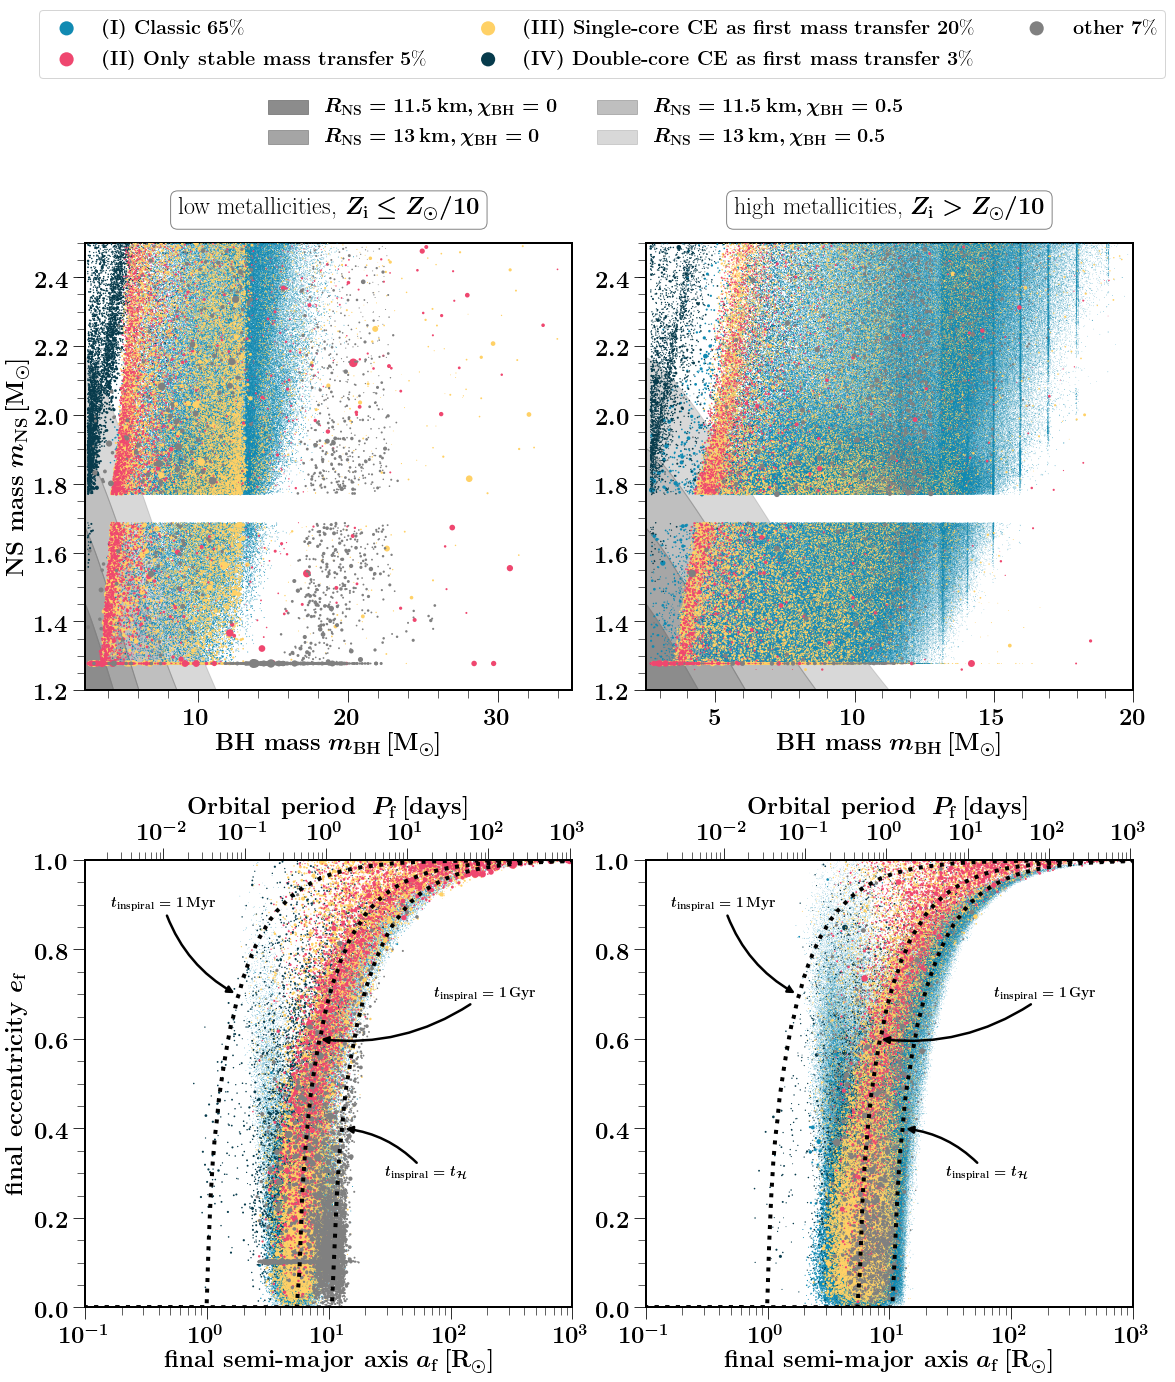

In [79]:
# Niter = 1000
# BH_array = np.linspace(2.5, 20, Niter)

ModelName = 'notMSSFRweighted'
stimes_weight = 25
metallicities = [0.0014,  0.01269]
metallicityLabels = ['\leq 0.01', '> 0.01']

WeightsRateIntrinsic_zIntegrated=False
# stimes_weight = 7


f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})



################ TOP PANELS ##########
    

xlabel = r'\textbf{BH mass} $m_{\rm{BH}} \, [\rm{M}_{\odot}]$'
ylabel = r'\textbf{NS mass} $m_{\rm{NS}} \, [\rm{M}_{\odot}]$'
PlotText=True
handles, labels = plotfinalmasses(ax=ax[0], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, \
              dictList=dictChannelsBHNSList, withinHubble=True, BHNSorNSBH='BHNS')




## Add Channel Legend to the plot
# with percentages 
lgd2 = f.legend(handles, legendlabel, fontsize=20, ncol=3,\
         bbox_to_anchor=(1.02, 1.20),  markerscale=3., scatterpoints=1) # loc = 'upper center')
# without percentages channel 
# lgd2 = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.99, 1.15),  markerscale=3., scatterpoints=1) # loc = 'upper center')

markersize_lgd = 200
lgd2.legendHandles[0]._sizes = [markersize_lgd]
lgd2.legendHandles[1]._sizes = [markersize_lgd]
lgd2.legendHandles[2]._sizes = [markersize_lgd]
lgd2.legendHandles[3]._sizes = [markersize_lgd]
lgd2.legendHandles[4]._sizes = [markersize_lgd]





############ BOTTOM PANELS ################
xlabel = r' \textbf{Orbital period } $P_{\rm{f}} \, [\rm{days}]$' #\rm{R}_{\odot}
ylabel = r'\textbf{final eccentricity $e_{\rm{f}}$} '
xlabel2 = r' \textbf{final semi-major axis} $a_{\rm{f}} \, [\rm{R}_{\odot}]$'

PlotText=False 
_,_ = ploteVSseparation(ax=ax[1], fc=None, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)


#########################################


# FINALIZING PLOT:

f.tight_layout(pad=0.4, w_pad=0.5, h_pad=4) 
# plt.subplots_adjust(hspace=.8)
# print(ModelName)
f.savefig('./BHNS_FinalParam_BugFix_'+ModelName +'.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi=600)
plt.show()
plt.close()        




# LOOP through ALL MODELS AND MAKE INITIAL AND DCO PLOTS

In [14]:
### ''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


# weightsSystems =  fdata['systems']['weight'][...].squeeze()

    


def plotfinalmassesLOOP(ax, fc, Data, dictRank, dictList, withinHubble=True, BHNSorNSBH=None):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    
    solar=0.0142
    LowZ = solar/10.
        
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    for z_ind, chosenMetallicity in enumerate(metallicities):
        

        rate_Z = np.zeros(6)
        rateALL = np.zeros(6)
        print('now at Z   %s'%metallicityLabels[z_ind])
#         mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
        solar = 0.0142
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)

            
            
#         Arrays_minNSmassEjecta_labels = [r'$(R_{\rm{NS}},\chi_{\rm{BH}})=11.5,0$',\
#                                          r'$(R_{\rm{NS}},\chi_{\rm{BH}})=13,0$',\
#                                          r'$(R_{\rm{NS}},\chi_{\rm{BH}})=11.5,0.5$', \
#                                          r'$(R_{\rm{NS}},\chi_{\rm{BH}})=13,0.5$']
        Arrays_minNSmassEjecta_labels = [r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=0$',\
                                         r'$R_{\rm{NS}}=13\,\rm{km}, \chi_{\rm{BH}}=0$',\
                                         r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=0.5$', \
                                         r'$R_{\rm{NS}}=13\,\rm{km},\chi_{\rm{BH}}=0.5$']
        Mej_alpha = np.linspace(0.3,0.9,4)[::-1]
        bottom = np.ones_like(BH_array)
        for ind_Mej, Mejline in enumerate(Arrays_minNSmassEjecta):
            if z_ind ==1:
                MejLabel=None
            else:
                MejLabel=Arrays_minNSmassEjecta_labels[ind_Mej] # = [r'$R_{\rm{NS}}=11.5, \chi_{\rm{BH}}=0$']
   
        
            ax[z_ind].fill_between(x=BH_array, y1=bottom, y2=Mejline, where= np.ones_like(BH_array)<=Mejline,\
                                    color='gray', label=MejLabel, alpha=Mej_alpha[ind_Mej], hatch='')
            bottom=Mejline
            

                    
        for nrC, Channel in enumerate(dictList):
            #Get the seeds that relate to sorted indices
#             seedsInterest = []
            seedsInterest = dictRank[Channel]
#             Channel_nr = Channel-1
#             for index in dictRank[Channel]:
#                 seedsInterest.extend(fc.sortedSeeds[index-1])
            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            if withinHubble == True:
                mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]
#             maskZ = (DATAmetallicities==chosenMetallicity)

            
            
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities > LowZ)

            
            # use the cosmic integrated weights if they exist - Coen Model
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight
#             weight = Data.weight            
            
            if z_ind==0:
#                 M1ZAMS = Data.m1zams[mask][maskZlow]
#                 M2ZAMS = Data.m2zams[mask][maskZlow]
                tc=Data.tc[mask][maskZlow]
                separationDCOFormation=Data.separationDCOFormation[mask][maskZlow]
                M1 = Data.mass1[mask][maskZlow]
                M2 = Data.mass2[mask][maskZlow]    
                weights= weight[mask][maskZlow] 
                maskZ=maskZlow
            elif z_ind==1:
#                 M1ZAMS = Data.m1zams[mask][maskZhigh]
#                 M2ZAMS = Data.m2zams[mask][maskZhigh]
#                 eccentricityDCOFormation=Data.eccentricityDCOFormation[mask][maskZhigh]
                separationDCOFormation=Data.separationDCOFormation[mask][maskZhigh]
                M1 = Data.mass1[mask][maskZhigh]
                M2 = Data.mass2[mask][maskZhigh]   
                weights= weight[mask][maskZhigh]   
                tc=Data.tc[mask][maskZhigh]
                maskZ=maskZhigh
            
            
            weightsALL = weights.squeeze() # //floor weights    

            
            MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2) 
            
            seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
            # get only SN seeds for DCOs 
            maskSNdco = np.in1d(seedsSN,  Data.seeds[mask][maskZ]) 
            whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
            whichSN1 = whichSN[::2] # get whichStar for first SN 
            
            
            separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
            separationPreSN2 = separationPreSN[1::2] # in Rsun. 
            
            
            
            print(len(whichSN1))
            print(len(M1))
            print(len(M2))
            maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )             
            print(np.sum(maskNSBH), len(maskNSBH), 'worked?')
   

            maskHubble = (tc<(13.7*10**3))
#             print('mask Hubble = ', np.sum(maskHubble))
#             print('mask All = ', len(maskHubble))

            # CHECK EJECTA MASS? 
            ii=0
            labelMej = []
            for ind_chi, chi in enumerate([0.0, .5, 'Qin']):
                if chi=='Qin':
                    # Qin 2018 spin model 
                    BH_chi = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
                else:    
                    BH_chi   = chi * np.ones_like(MNS)
                
                for ind_Rns, NSradii in enumerate([11.5,13.0]):
                    Rns = NSradii
                    NS_radii = Rns * np.ones_like(MNS)

                    Mej = calculateEjectedMassMerger(m_ns=MNS, r_ns=NS_radii, m_bh=MBH, Xeff=BH_chi)

                    maskEjecta = (Mej > 0)
                    
                    rate_Z[ii]+= np.sum(weightsALL[maskEjecta])
                    labelMej.append('chi = ' + str(chi) + ' Rns = ' + str(NSradii) +' km')
                    ii+=1
                    

        #                 maskq5 = (MBH/MNS <=5.0)
        
            
            
            
            rateALL+=np.sum(weightsALL)
            
            if z_ind==1: # only legendlabel in one of 2 metallicity plots
                legendlabel=Channel
            else:
                legendlabel=None

            ax[z_ind].scatter(MBH, MNS, s=(weightsALL*stimes_weight), edgecolor ='', linewidth=0.1,\
             c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])

                            
#             ax[z_ind].scatter(MBH, MNS, s=weightsALL*stimes_weight, edgecolor ='', linewidth=0.1,\
#              c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel])

                

            
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
#             ax[z_ind].tick_params(which='both', width=2)
            
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
#         ax[z_ind].grid(True, which='major');

        ax[z_ind].set_xlabel(xlabel, fontsize=fs)
        
        
        ax[z_ind].tick_params(labelsize=fs)

        # PLOT metallicity labels 
        if z_ind==0:
            text_Z =    r'low metallicities, '+ r'$Z_{\rm{i}} \leq Z_{\odot}/10$' # 'low metallicity \n '
        elif z_ind==1:
            text_Z =    r'high metallicities, ' + r'$Z_{\rm{i}} > Z_{\odot}/10$'  #'high metallicity \n'
        
        if PlotText == True:
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(text_Z, xy=(0.5, 1.1), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)
  
        
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.75)
#         ax[z_ind].annotate(r'$Z = %s$'%chosenMetallicity, xy=(0.05, 0.95), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props, zorder=100)

        
        if z_ind ==1:    
            ax[z_ind].set_xlim(3, 30)
            ax[z_ind].set_ylim(1.1, 3)
            handles, labels = ax[z_ind].get_legend_handles_labels() 
        if z_ind ==0:    
            ax[z_ind].set_xlim(2, 45)
            ax[z_ind].set_ylim(1.1, 3)
            f.legend(fontsize=20, frameon=False, bbox_to_anchor=(.8, 1.13), ncol=2, markerscale=3.)
#             legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.9, 1.09),  markerscale=3., scatterpoints=1) # loc = 'upper center')

            
        if (LOOP == True) & (z_ind==0):
            
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model], xy=(0.90, .95),\
                         xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='right', va="top",bbox=bbox_props,\
                        zorder=1E10)



        print()
        print('for Z=',text_Z, 'we find rates with Mej of: ')
        for ii, lab in enumerate(labelMej):
            
            print(lab, ' = ',   np.asarray(rate_Z[ii])/np.asarray(rateALL[0]))
        
        
        
    return handles, labels








In [15]:
import string

nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}

In [16]:
# MAKE INITIAL AND FINAL PARAMETER FIGURES FOR ALL MODELS:

In [30]:
fdata.close()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
87432950


../../Scripts/ClassFormationChannels_5mainchannels.py:130: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[maskInterest]


('percentage Classic        = ', 75.94106760675946)
('percentage Only stable MT =  ', 3.05434727665894)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:377: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[RLOF_Z_MASK][maskInterest]


percentage double core CE channel = 1.3104136709655598
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:533: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[RLOF_Z_MASK][maskInterest]


percentage single core CE channel = 18.08290204039157
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
('percentage other channel = ', 1.611269405224576)
75.94\%
\textbf{(I) Classic} $76$\%
3.05\%
\textbf{(II) Only stable mass transfer} $3$\%
18.08\%
\textbf{(III) Single-core CE as first mass transfer} $18$\%
1.31\%
\textbf{(IV) Double-core CE as first mass transfer} $1$\%
1.61\%
\textbf{other} $2$\%
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
5068628
(59861.561359783715, 5068628)
-----------------
now doing initial masses
-----------------
now at z_ind = 0, which are Z pprox 0.00142
(373927, '= # BHNS')
(8452, '= # BHNS')
(60687, '= # BHNS')
(5423, '= # BHNS')
(5261, '= # BHNS')
now at z_ind = 1, which are Z pprox solar
(4445751, '= # BHNS')
(12606, '= # BHNS')
(153054, '= # BHNS')
(3446, '= # BHNS')
(21, '= # BHNS')
-----------------
now doing q vs separation
-----------------
now at z_ind = 0, which

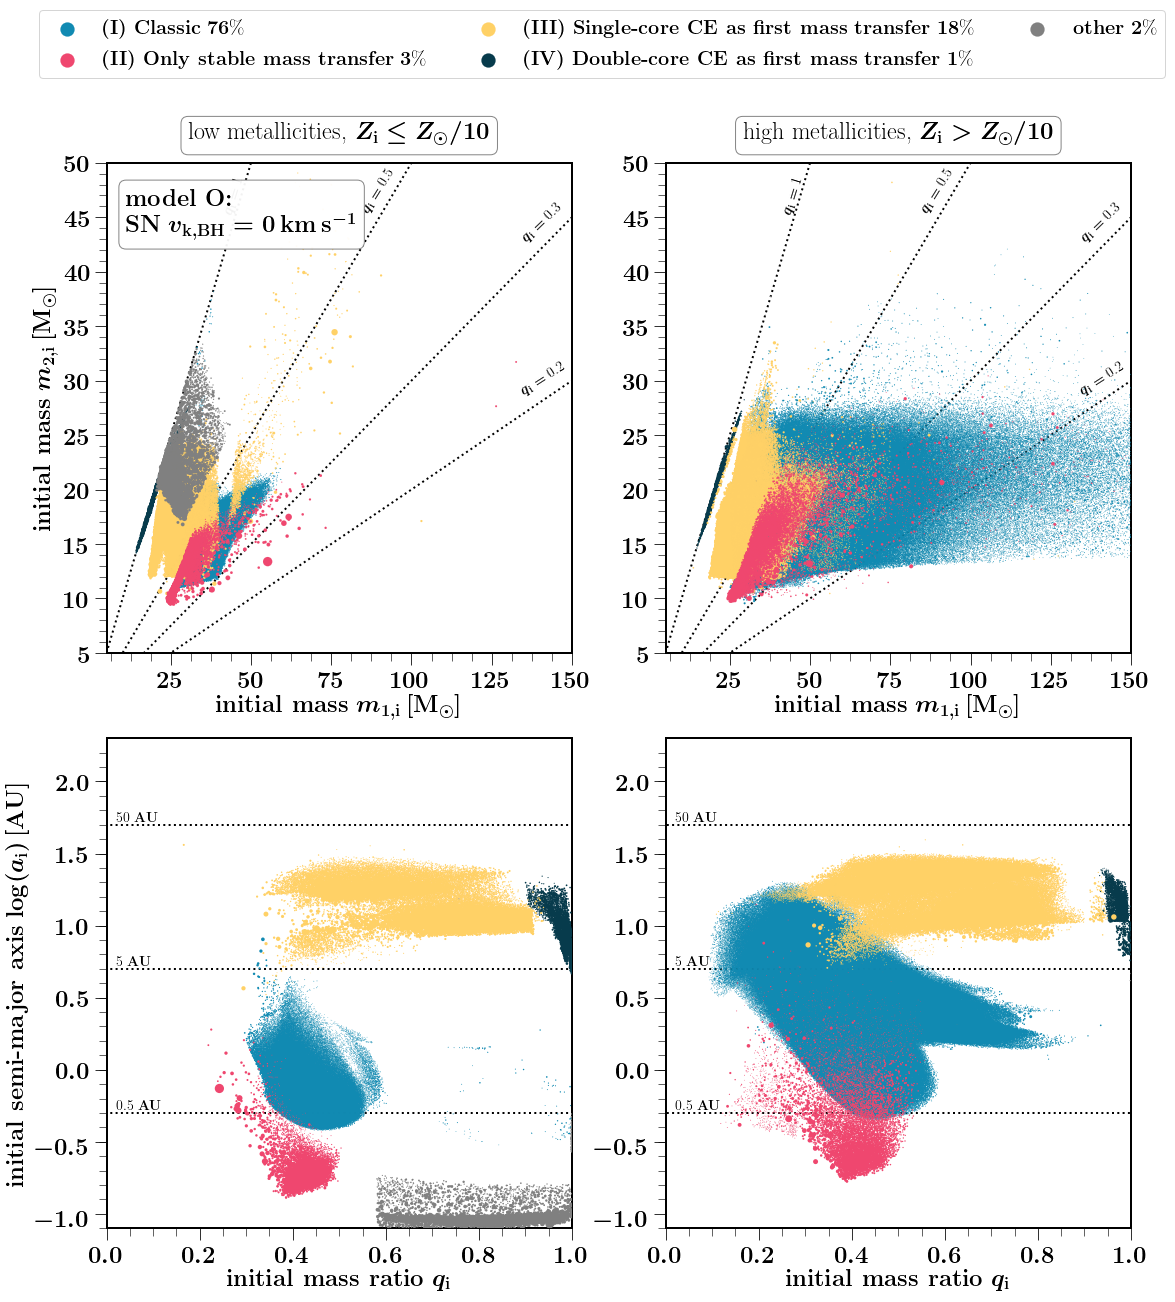

now at Z   \leq 0.01
373927
373927
373927
(28, 373927, 'worked?')
8452
8452
8452
(0, 8452, 'worked?')
60687
60687
60687
(0, 60687, 'worked?')
5423
5423
5423
(3440, 5423, 'worked?')
5261
5261
5261
(2504, 5261, 'worked?')
()
('for Z=', 'low metallicities, $Z_{\\rm{i}} \\leq Z_{\\odot}/10$', 'we find rates with Mej of: ')
('chi = 0.0 Rns = 11.5 km', ' = ', 0.056104130584415185)
('chi = 0.0 Rns = 13.0 km', ' = ', 0.10240238540547296)
('chi = 0.5 Rns = 11.5 km', ' = ', 0.1948019435257779)
('chi = 0.5 Rns = 13.0 km', ' = ', 0.3305167222947261)
('chi = Qin Rns = 11.5 km', ' = ', 0.10268722920295578)
('chi = Qin Rns = 13.0 km', ' = ', 0.1515487570175243)
now at Z   > 0.01
4445751
4445751
4445751
(1, 4445751, 'worked?')
12606
12606
12606
(0, 12606, 'worked?')
153054
153054
153054
(1, 153054, 'worked?')
3446
3446
3446
(3059, 3446, 'worked?')
21
21
21
(0, 21, 'worked?')
()
('for Z=', 'high metallicities, $Z_{\\rm{i}} > Z_{\\odot}/10$', 'we find rates with Mej of: ')
('chi = 0.0 Rns = 11.5 km', ' 

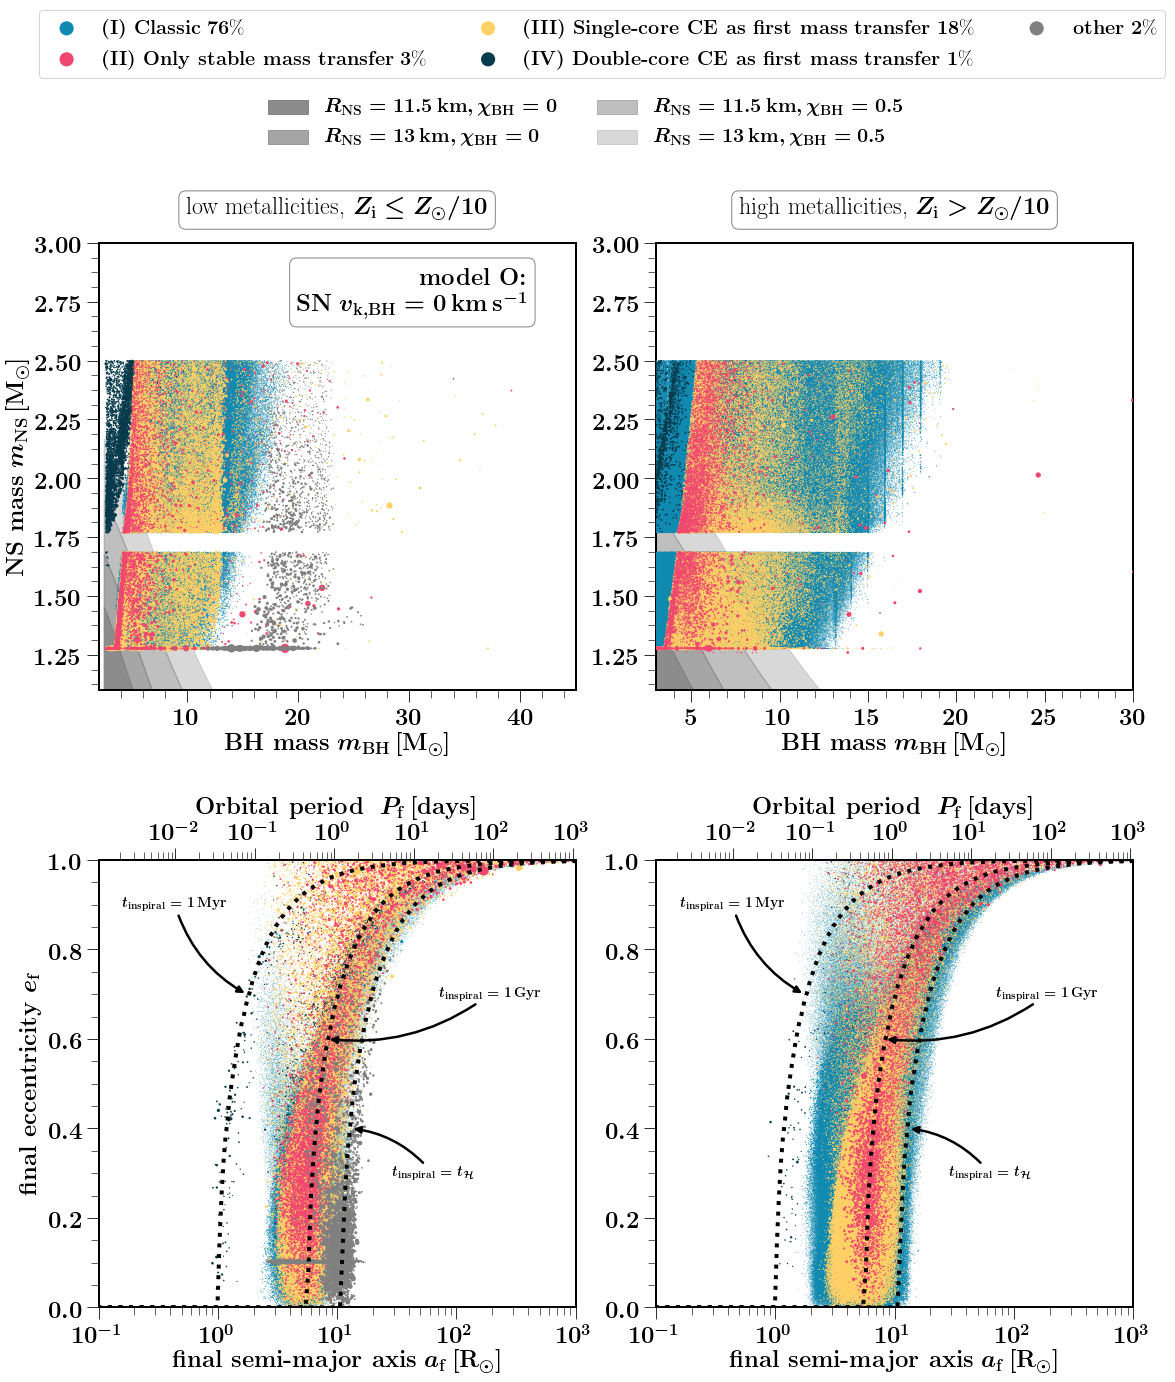

False

In [16]:
colorlist = [ '#118AB2', '#EF476F', '#FFD166', '#073B4C', 'gray']
# def plotInitialForModel(DCOtype='BHNS', bps_model='A', alphabetDirDict=None, pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/'):

DCOtype='BHNS'
bps_model='O' 
alphabetDirDict=alphabetDirDict
pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/'
path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'
fdata = h5.File(path + 'COMPASOutput.h5')

# plotInitialForModel(DCOtype='BHNS', bps_model='B', alphabetDirDict=alphabetDirDict, pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/')    

path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'
pathCOMPASOutput = path
OPTIMISTIC=False
if bps_model=='H':
    OPTIMISTIC=True
    print('doing optimistic version of fiducial')    

seedsPercentageClassic, seedsPercentageOnlyStableMT = returnSeedsPercentageClassicAndOnlyStableMT(pathCOMPASOutput=pathCOMPASOutput,\
                                types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                binaryFraction=1)
seedsClassic, percentageClassic = seedsPercentageClassic
seedsOnlyStableMT, percentageOnlyStableMT = seedsPercentageOnlyStableMT



seedsDoubleCE, percentageDoubleCE = returnSeedsPercentageDoubleCoreCEE(pathCOMPASOutput=pathCOMPASOutput,\
                                types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                binaryFraction=1)


seedsSingleCE, percentageSingleCE = returnSeedsPercentageSingleCoreCEE(pathCOMPASOutput=pathCOMPASOutput,\
                                types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                binaryFraction=1)



seedschannels = [seedsClassic, seedsOnlyStableMT, seedsSingleCE, seedsDoubleCE]

seedsOther, percentageOther = returnSeedsPercentageOther(pathCOMPASOutput=pathCOMPASOutput,\
                                types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                binaryFraction=1, channelsSeedsList=seedschannels)




dictChannelsBHNS = { 'classic':seedsClassic, \
                    'immediate CE':seedsSingleCE,\
                         'stable B no CEE':seedsOnlyStableMT, \
                     r'double-core CE':seedsDoubleCE,  \
                        'other':seedsOther\
                       }


dictPercentages = { 'classic':percentageClassic, \
                    'immediate CE':percentageSingleCE,\
                         'stable B no CEE':percentageOnlyStableMT, \
                     r'double-core CE':percentageDoubleCE,  \
                        'other':percentageOther\
                       } 






legendlabel = []
for ind, key in enumerate(dictChannelsBHNSList):

    print(str((round(dictPercentages[key],2))) + str(r'\%'))
    string = dictChannelsBHNSListBolt[ind] + ' ' + r'$%s$'%str((roundAndFormat1(dictPercentages[key]))) + str(r'\%')
    print(string)
    legendlabel.append(string)


# fc = FC.FormationChannels(path = pathCOMPASOutput)
# fc.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
#Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]


print(len(SeedsHubble))

print(np.sum(Data.weight), len((Data.weight)))



DATAmetallicities = Data.metallicitySystems


stimes_weight = 200


            
LOOP =True
            
  
#             ax[z_ind].annotate(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model], xy=(0.042, .95),\
#                          xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
#                         zorder=1E10)

# Use MSSFR Integrated weights?
WeightsRateIntrinsic_zIntegrated=False
if WeightsRateIntrinsic_zIntegrated==False:
    ModelName = 'notMSSFRweighted'

stimes_weight = 25
metallicities = [0.0014,  0.01269]
metallicityLabels =  ['\approx 0.00142', '\approx solar']#['\leq Z__{\odot}/10', '> Z__{\odot}/10']


print('-----------------')
print('now doing initial masses')
print('-----------------')

f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})




#### PLOT SEPARATION AND MASS RATIO ###
# xlabel = r'\textbf{initial mass} $\log(m_{1,{\rm{i}}}) \, [\rm{M}_{\odot}]$'
# ylabel = r'\textbf{initial mass} $\log(m_{2,{\rm{i}}}) \, [\rm{M}_{\odot}]$'
xlabel = r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$'
ylabel = r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$'


PlotText = True
fc=None

handles, labels = plotInitialMasses(ax=ax[0], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList,channelLabelList=range(8), withinHubble=True)

lgd2 = f.legend(handles, legendlabel, fontsize=20, ncol=3,\
         bbox_to_anchor=(1.02, 1.13),  markerscale=3., scatterpoints=1) # loc = 'upper center')






markersize_lgd = 200
lgd2.legendHandles[0]._sizes = [markersize_lgd]
lgd2.legendHandles[1]._sizes = [markersize_lgd]
lgd2.legendHandles[2]._sizes = [markersize_lgd]
lgd2.legendHandles[3]._sizes = [markersize_lgd]
lgd2.legendHandles[4]._sizes = [markersize_lgd]



xlabel = r'\textbf{initial mass ratio} $q_{\rm{i}} $'
ylabel2 = r'\textbf{initial separation} $a_{\rm{i}} \, [\rm{AU}]$'
# ylabel = r'\textbf{initial separation} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$'
ylabel = r'\textbf{initial semi-major axis} $\log(a_{\rm{i}}) \, [\rm{AU}]$'

print('-----------------')
print('now doing q vs separation')
print('-----------------')

# f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
PlotText = False
handles, labels = plotInitialqVSseparation(ax=ax[1], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)






f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5) 
f.savefig('./'+ DCOtype +'_DCOpropertiesModelVariations/InitialParam_' + bps_model + '.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()
plt.close()        



fdata = h5.File(path + 'COMPASOutput.h5')


# Niter = 1000
# BH_array = np.linspace(2.5, 20, Niter)

ModelName = 'notMSSFRweighted'
stimes_weight = 25
metallicities = [0.0014,  0.01269]
metallicityLabels = ['\leq 0.01', '> 0.01']

WeightsRateIntrinsic_zIntegrated=False
# stimes_weight = 7


f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})



################ TOP PANELS ##########


xlabel = r'\textbf{BH mass} $m_{\rm{BH}} \, [\rm{M}_{\odot}]$'
ylabel = r'\textbf{NS mass} $m_{\rm{NS}} \, [\rm{M}_{\odot}]$'
PlotText=True
handles, labels = plotfinalmassesLOOP(ax=ax[0], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, \
              dictList=dictChannelsBHNSList, withinHubble=True, BHNSorNSBH='BHNS')




## Add Channel Legend to the plot
# with percentages 
lgd2 = f.legend(handles, legendlabel, fontsize=20, ncol=3,\
         bbox_to_anchor=(1.02, 1.20),  markerscale=3., scatterpoints=1) # loc = 'upper center')
# without percentages channel 
# lgd2 = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.99, 1.15),  markerscale=3., scatterpoints=1) # loc = 'upper center')

markersize_lgd = 200
lgd2.legendHandles[0]._sizes = [markersize_lgd]
lgd2.legendHandles[1]._sizes = [markersize_lgd]
lgd2.legendHandles[2]._sizes = [markersize_lgd]
lgd2.legendHandles[3]._sizes = [markersize_lgd]
lgd2.legendHandles[4]._sizes = [markersize_lgd]





############ BOTTOM PANELS ################
xlabel = r' \textbf{Orbital period } $P_{\rm{f}} \, [\rm{days}]$' #\rm{R}_{\odot}
ylabel = r'\textbf{final eccentricity $e_{\rm{f}}$} '
xlabel2 = r' \textbf{final semi-major axis} $a_{\rm{f}} \, [\rm{R}_{\odot}]$'

PlotText=False 
_,_ = ploteVSseparation(ax=ax[1], fc=None, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)


#########################################


# FINALIZING PLOT:

f.tight_layout(pad=0.4, w_pad=0.5, h_pad=4) 

f.savefig('./'+DCOtype +'_DCOpropertiesModelVariations/FinalParam_' + bps_model + '.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()
plt.close()   
fdata.close()

LOOP == False     



    


In [141]:
import string
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}

print(alphabetDirDict['B'])

print(np.unique([1,1,2]))



alphabetDirDict=alphabetDirDict

massTransferEfficiencyFixed_0_25
[1 2]


In [157]:
# DCOtype='BHNS'
# bps_model='B' 
# alphabetDirDict=alphabetDirDict
# pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/'
# path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'
# fdata = h5.File(path + 'COMPASOutput.h5')

# plotInitialForModel(DCOtype='BHNS', bps_model='B', alphabetDirDict=alphabetDirDict, pathCOMPASOutput='/Volumes/Andromeda2/DATA/AllDCO_bugfix/')

In [ ]:
94799*2 

### figure out locations of arrows: 

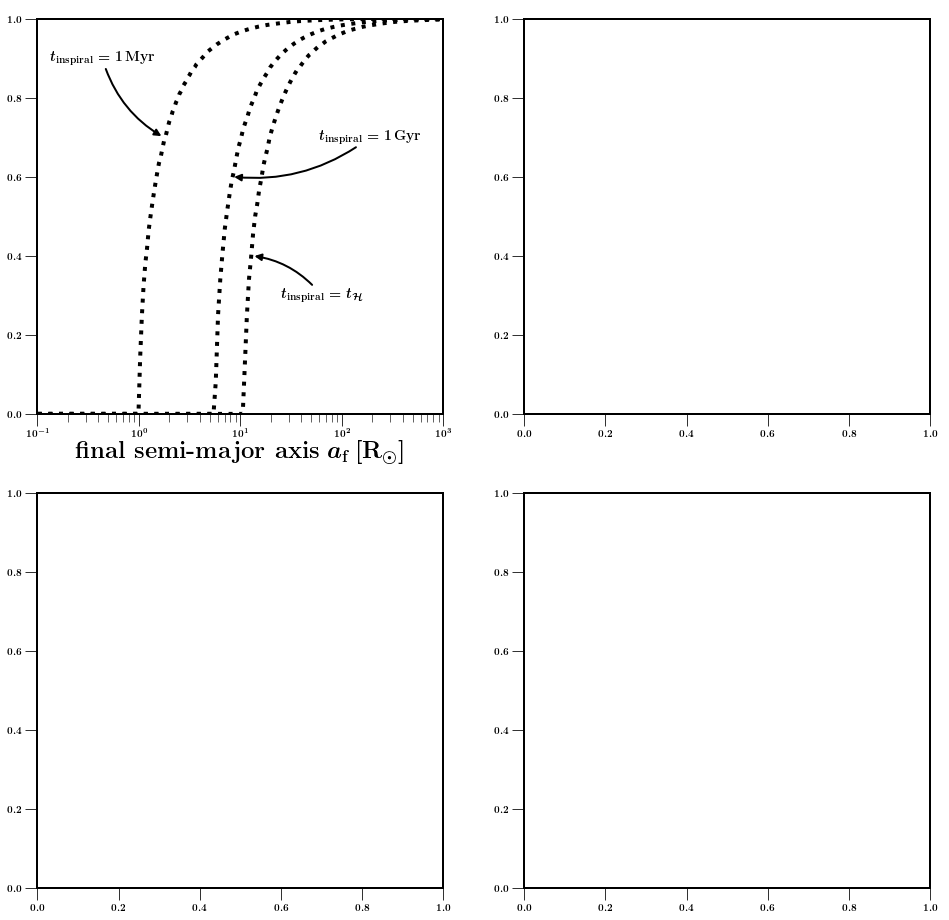

In [158]:
fig, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})


x_ecc = [x_eccentricities_toneMyr, x_eccentricities_tGyr, x_eccentricities_tHubble]
for ind_line, x_sep in enumerate([x_separation_toneMyr, x_separation_tGyr, x_separation_tHubble]):

    ax[0,0].plot((x_sep.value), x_ecc[ind_line], lw=4, color = 'k',linestyle=':', zorder=2000)        


    if ind_line==0:
        strr = r"$t_{\rm{inspiral}}=1\,\rm{Myr}$"
        x_xy, y_xy = 0.31,0.7
        x_xytext, y_xytext = 0.16, 0.90 
        conn = "arc3,rad=+0.2"

    elif ind_line==1:
        strr = r"$t_{\rm{inspiral}}=1\,\rm{Gyr}$"
        x_xy, y_xy = 0.48, 0.6
        x_xytext, y_xytext = 0.82, 0.7
        conn = "arc3,rad=-0.2"

    elif ind_line==2:
        strr = r"$t_{\rm{inspiral}}=t_{\mathcal{H}}$"
        x_xy, y_xy = 0.53,0.4
        x_xytext, y_xytext = 0.7, 0.3  
        conn = "arc3,rad=+0.2"


    ax[0,0].annotate(strr,
      xy=(x_xy, y_xy), xycoords='axes fraction',
      xytext=(x_xytext, y_xytext), textcoords='axes fraction',
      size=14, va="center", ha="center",
#                   bbox=dict(boxstyle="round4", fc="w"),
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", lw=2), zorder=1E10
                  )      
ax[0,0].set_xlabel(xlabel2, fontsize=fs)
ax[0,0].set_xscale('log')

ax[0,0].set_xlim(.1, 10**3)
ax[0,0].set_ylim(0, 1)               

plt.show()


## Calculate fractions for A000 Fiducial model MSSFR weighted 

In [ ]:
# def calculate_CI_fraction(seedsDict=dictChannelsBHNS, channelsList=dictChannelsBHNSList, pathCOMPASOutput, DCOtypes='BHNS', optimistic=False, withinHubbleTime=True)

### A000

In [ ]:
import ClassCosmicIntegrator  as CI 

#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 1.
resz = 100
Data_CI = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BHNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='Custom Flat', withinHubbleTime=True)


Data_CI.MSSFR.Zprescription         = 'logNormal' 
Data_CI.MSSFR.SFRprescription       = 'Neijssel et al. (2019)'
Data_CI.MSSFR.logNormalPrescription = 'Neijssel Phenomenological'
Data_CI.MSSFR.GSMFprescription      = None
Data_CI.MSSFR.ZMprescription        = None
Data_CI.cosmologicalIntegration()
weightSTROOPWAFEL = Data_CI.COMPAS.weight # //floor weight
Row        =  np.sum(Data_CI.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
# 

rateIntrinsic = Data_CI.PerSystemPerRedshift_ratesIntrinsic[:,:] * Data_CI.COMPAS.weight
rateIntrinsic_zIntegrated = (np.sum(rateIntrinsic, axis=0))
ModelName = 'A000'



In [ ]:
print(len(rateIntrinsic_zIntegrated))

In [ ]:
weights_MSSFR_A000 = rateIntrinsic_zIntegrated 
weights_LVK = np.sum(Data_CI.PerSystemPerRedshift_ratesObserved*Data_CI.COMPAS.weight, axis=0)
print(len(weights_MSSFR_A000))
# print(len())
def calculate_CI_fraction(seedsDict=dictChannelsBHNS, channelsList=dictChannelsBHNSList, weights_MSSFR=rateIntrinsic_zIntegrated, weights_LVK=weights_LVK):
    
    
    allSeeds = Data_CI.COMPAS.seeds 
    totalWeightMSSFR = np.sum(weights_MSSFR)
    totalWeightLVK =np.sum(weights_LVK)
    
    for ind_c, channel in enumerate(channelsList):
        seedsChannel = seedsDict[channel]
        
        maskSeedsChannel = np.in1d(allSeeds, seedsChannel)
        
        # MSSFR FORMED WEIGHTED
        percentagechannelMSSFR = (np.sum( weights_MSSFR[maskSeedsChannel]) /totalWeightMSSFR)*100
        
        # LVK OBSERVED  FORMED WEIGHTED
        percentagechannelLVK = (np.sum(weights_LVK[maskSeedsChannel]) /totalWeightLVK)*100        
        
        print '-- formed mergers for ', channel, '---'
        print 'in simulation = ',  100*(np.sum(Data_CI.COMPAS.weight[maskSeedsChannel]/np.sum(Data_CI.COMPAS.weight))), '%'
        print 'over MSSFR = ', '(', roundAndFormat1(percentagechannelMSSFR), '%', ')', percentagechannelMSSFR, '%'
        print 'in LVK observations = ', '(', roundAndFormat1(percentagechannelLVK),'%', ')', percentagechannelLVK, '%'
        print
    
    
    return 
calculate_CI_fraction(seedsDict=dictChannelsBHNS, channelsList=dictChannelsBHNSList, weights_MSSFR=weights_MSSFR_A000)

### A231 

In [ ]:
Data_CI.MSSFR.Zprescription         = 'MZ_GSMF' 
Data_CI.MSSFR.SFRprescription       = 'Strolger et al. (2004)'
Data_CI.MSSFR.logNormalPrescription = None
Data_CI.MSSFR.GSMFprescription      = 'Furlong et al. (2015) Double'
Data_CI.MSSFR.ZMprescription        =  'Langer et al. (2006)'
Data_CI.cosmologicalIntegration()
weightSTROOPWAFEL = Data_CI.COMPAS.weight # //floor weight
Row        =  np.sum(Data_CI.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
# 

rateIntrinsic = Data_CI.PerSystemPerRedshift_ratesIntrinsic[:,:] * Data_CI.COMPAS.weight
rateIntrinsic_zIntegrated = (np.sum(rateIntrinsic, axis=0))
ModelName = 'A231'

In [ ]:
weights_MSSFR_A231 = rateIntrinsic_zIntegrated 
weights_LVK_A231 = np.sum(Data_CI.PerSystemPerRedshift_ratesObserved*Data_CI.COMPAS.weight, axis=0)

print 'FRACTIONS FOR A231 model '
calculate_CI_fraction(seedsDict=dictChannelsBHNS, channelsList=dictChannelsBHNSList, weights_MSSFR=weights_MSSFR_A231, weights_LVK=weights_LVK_A231 )


In [ ]:
# ncols=3
# nrows=1
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
#               gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


In [ ]:
import string
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}

print(alphabetDirDict['B'])

print(np.unique([1,1,2]))





In [ ]:
aa = range(15)

def Reverse(lst): 
    return [ele for ele in reversed(lst)]
print(Reverse(aa))

In [ ]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    
    ncols=3
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=14
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^",  "+","<", 'x', "3","d","1", "|", ">", 'X']
    solar = 0.0142
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)
    
    
    for ind_t, DCOtype in enumerate(Types):
        print('now at DCO type  ', DCOtype)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
            print('now at model ', alphabetDirDict[bps_model])
            
            # set always optimistic CE false, unless we are doing the optimistic variation
            OPTIMISTIC=False
            if bps_model=='H':
                OPTIMISTIC=True
                print('doing optimistic version of fiducial')
            
            # path to datafile 
            path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'

            
            #But I want only within Hubble time 
            Data            = CC.COMPASData(path=path, lazyData=True, Mlower=5., \
                             Mupper=150., binaryFraction=1)
            Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
            Data.setCOMPASData()
            
            metallicities = Data.metallicitySystems
            seeds    = Data.seeds[Data.Hubble==True]
            weights = Data.weight
            
            
            log10ZZsun = np.round(np.log10(np.unique(Data.metallicityGrid)/solar),2)
            
            upperY = np.zeros(len(Data.metallicityGrid))

    
    
            print(len(np.unique(metallicities)))
#             print(np.unique(metallicities))
            print(len(Data.metallicityGrid))
#             print(Data.metallicityGrid)
            
            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = (metallicities == Z)
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + 0 #lowerY        

            if ind_t==0:  
                labelname=BPSnameslist[ind_m]
            else:
                labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
            
            axe[ind_t].plot(log10ZZsun, upperY*1e5, color=BPScolors[ind_m], \
                      lw=3, alpha=1,  linestyle='-', label=labelname, zorder=zorderlist[ind_m])
            
            
            
            
            axe[ind_t].scatter(log10ZZsun, upperY*1e5, marker=markershapes[ind_m],\
                             c=BPScolors[ind_m],\
                             s=20, linewidths=1.5, edgecolors='k',\
                               alpha=1, zorder=zorderlist[ind_m]+1)            


        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$',r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.004$' , r'$Z_{\rm{i}}=0.002$']
        for zz_ind, zz in enumerate([0, np.log10(0.5), np.log10(0.001/solar),\
                                     np.log10(0.004/solar), np.log10(0.002/solar)]) :
            axe[ind_t].plot([zz,zz], [0,100], \
                             c='k',\
                             lw=2, alpha=1, linestyle=':', zorder=0)   
            
            axe[ind_t].text(zz-0.1, 100, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')


    
        nameX = r'$\log_{10}(Z_{\rm{i}}/\rm{Z}_{\odot})$'
        nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe[ind_t] = CV.layoutAxes(axe[ind_t], nameX=nameX, nameY=nameY)
    

    

        axe[ind_t].set_yscale('log')
        aBit =0.
        axe[ind_t].set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
        axe[ind_t].set_ylim(bottom=0.001,top=100)

            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_t].annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props)

        if ind_t ==0:    
            handles, labels = axe[ind_t].get_legend_handles_labels()
    

    plt.tight_layout()
    plt.legend(handles, labels , fontsize=20, ncol=7,\
         bbox_to_anchor=(.052, 1.30)) #,  markerscale=3., scatterpoints=1)
    
    # plt.grid(True)
    plt.savefig('./Rate_vs_Z_BPSmodels2.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close()    
    
plotFormationRatePerZ(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict)    
    
    


In [ ]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    
    ncols=3
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=14
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^",  "+","<", 'x', "3","d","1", "|", ">", 'X']
    solar = 0.0142
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)
    
    
    for ind_t, DCOtype in enumerate(Types):
        print('now at DCO type  ', DCOtype)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
            print('now at model ', alphabetDirDict[bps_model])
            
            # set always optimistic CE false, unless we are doing the optimistic variation
            OPTIMISTIC=False
            if bps_model=='H':
                OPTIMISTIC=True
                print('doing optimistic version of fiducial')
            
            # path to datafile 
            path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'

            
            #But I want only within Hubble time 
            Data            = CC.COMPASData(path=path, lazyData=True, Mlower=5., \
                             Mupper=150., binaryFraction=1)
            Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
            Data.setCOMPASData()
            
            metallicities = Data.metallicitySystems
            seeds    = Data.seeds[Data.Hubble==True]
            weights = Data.weight
            
            
            log10ZZsun = np.round(np.log10(np.unique(Data.metallicityGrid)/solar),2)
            
            upperY = np.zeros(len(Data.metallicityGrid))

    
    
            print(len(np.unique(metallicities)))
#             print(np.unique(metallicities))
            print(len(Data.metallicityGrid))
#             print(Data.metallicityGrid)
            
            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = (metallicities == Z)
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + 0 #lowerY        

            if ind_t==0:  
                labelname=BPSnameslist[ind_m]
            else:
                labelname=None

            if ind_m==0:
                c_=BPScolors[ind_m]
                lw_=5 
                a_=1
            else:
                c_='gray'
                lw_=1.5
                a_ = 0.8
                
            
            axe[ind_t].plot(log10ZZsun, upperY*1e5, color=c_, \
                      lw=lw_, alpha=a_,  linestyle='-',  zorder=zorderlist[ind_m])
            
            
            
            
            axe[ind_t].scatter(log10ZZsun, upperY*1e5, marker=markershapes[ind_m],\
                             c=BPScolors[ind_m],\
                             s=20, linewidths=1.5, edgecolors='k',\
                               alpha=1, zorder=zorderlist[ind_m]+1, label=labelname)            


        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$',r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.004$' , r'$Z_{\rm{i}}=0.002$']
        for zz_ind, zz in enumerate([0, np.log10(0.5), np.log10(0.001/solar),\
                                     np.log10(0.004/solar), np.log10(0.002/solar)]) :
            axe[ind_t].plot([zz,zz], [0,100], \
                             c='k',\
                             lw=2, alpha=1, linestyle=':', zorder=0)   
            
            axe[ind_t].text(zz-0.1, 100, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')


    
        nameX = r'$\log_{10}(Z_{\rm{i}}/\rm{Z}_{\odot})$'
        nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe[ind_t] = CV.layoutAxes(axe[ind_t], nameX=nameX, nameY=nameY)
    

    

        axe[ind_t].set_yscale('log')
        aBit =0.
        axe[ind_t].set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
        axe[ind_t].set_ylim(bottom=0.001,top=100)

            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_t].annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props)

        if ind_t ==0:    
            handles, labels = axe[ind_t].get_legend_handles_labels()
    

    plt.tight_layout()
    plt.legend(handles, labels , fontsize=20, ncol=7,\
         bbox_to_anchor=(.052, 1.30), markerscale=3., scatterpoints=1)
    
    # plt.grid(True)
    plt.savefig('./Rate_vs_Z_BPSmodels_gray.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close()    
    
plotFormationRatePerZ(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict)    
    
    


# NON LOG 

In [ ]:
import random
random.random()

In [ ]:
def plotFormationRatePerZ(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    
    ncols=3
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=14
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^",  "+","<", 'x', "3","d","1", "|", ">", 'X']
    solar = 0.0142
    
    
    for ind_t, DCOtype in enumerate(Types):
        print('now at DCO type  ', DCOtype)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
            print('now at model ', alphabetDirDict[bps_model])
            
            # set always optimistic CE false, unless we are doing the optimistic variation
            OPTIMISTIC=False
            if bps_model=='H':
                OPTIMISTIC=True
                print('doing optimistic version of fiducial')
            
            # path to datafile 
            path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'

            
            #But I want only within Hubble time 
#             Data            = CC.COMPASData(path=path, lazyData=True, Mlower=5., \
#                              Mupper=150., binaryFraction=1)
#             Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
#             Data.setCOMPASData()
            
#             metallicities = Data.metallicitySystems
#             seeds    = Data.seeds[Data.Hubble==True]
#             weights = Data.weight
            
            zzzzz = np.logspace(-4, np.log10(0.033), 50)

            log10ZZsun = (np.log10(zzzzz/0.0142))
#             log10ZZsun =   np.round(np.log10(np.unique(metall/solar)),2)
            
#             upperY = np.zeros(len(Data.metallicityGrid))

    

            upperY = np.ones(50)*random.random() #lowerY        
            
            if ind_t==0:  
                labelname=BPSnameslist[ind_m]
            else:
                labelname=None
                
            if ind_m ==0:
                LW=4
                Alpha =1
            else:
                LW=2
                Alpha=1

            axe[ind_t].plot(log10ZZsun, upperY, color=BPScolors[ind_m], \
                      lw=LW, alpha=Alpha, zorder=1000, linestyle='-', label=labelname)
            if ind_m ==0:
                mt="*"
                axe[ind_t].scatter(log10ZZsun, upperY, marker=markershapes[ind_m],\
                                 c=BPScolors[ind_m],\
                                 s=30, linewidths=1.5, edgecolors='k',\
                                   alpha=1, zorder=10000)            


        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$',r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.004$' , r'$Z_{\rm{i}}=0.002$']
        for zz_ind, zz in enumerate([0, np.log10(0.5), np.log10(0.001/solar),\
                                     np.log10(0.004/solar), np.log10(0.002/solar)]) :
            axe[ind_t].plot([zz,zz], [0,100], \
                             c='k',\
                             lw=2, alpha=1, linestyle=':', zorder=600)   
            
            axe[ind_t].text(zz-0.1, 100, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')


    
        nameX = r'$\log_{10}(Z_{\rm{i}}/\rm{Z}_{\odot})$'
        nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe[ind_t] = CV.layoutAxes(axe[ind_t], nameX=nameX, nameY=nameY)
    

    

        axe[ind_t].set_yscale('log')
        aBit =0.
        axe[ind_t].set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
        axe[ind_t].set_ylim(bottom=0.001,top=100)

            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_t].annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props)

        if ind_t ==0:    
            handles, labels = axe[ind_t].get_legend_handles_labels()
    
    plt.tight_layout()
    plt.legend(handles, labels , fontsize=20, ncol=7,\
         bbox_to_anchor=(.052, 1.30)) #,  markerscale=3., scatterpoints=1)
    
    
    # plt.grid(True)
#     plt.savefig('./Rate_vs_Z_BPSmodels2.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close()    
    
plotFormationRatePerZ(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict)    
    
    

    
    
    
    

In [ ]:
def plotFormationRatePerZ_NSBH(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    ncols=3
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BHNS']
    TypesLabels      = ['NS-BH']
    nModels=14
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^",  "+","<", 'x', "3","d","1", "|", ">", 'X']
    solar = 0.0142
    
    
    for ind_t, DCOtype in enumerate(Types):
        print('now at DCO type  ', DCOtype)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
            print('now at model ', ind_m+1, '/', nModels, ' :', alphabetDirDict[bps_model])
            
            # set always optimistic CE false, unless we are doing the optimistic variation
            OPTIMISTIC=False
            if bps_model=='H':
                OPTIMISTIC=True
                print('doing optimistic version of fiducial')
            
            # path to datafile 
            path = pathCOMPASOutput+alphabetDirDict[bps_model] + '/'

            
            #But I want only within Hubble time 
            Data            = CC.COMPASData(path=path, lazyData=True, Mlower=5., \
                             Mupper=150., binaryFraction=1)
            Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
            Data.setCOMPASData()
            
            metallicities = Data.metallicitySystems
            seeds    = Data.seeds[Data.Hubble==True]
            weights = Data.weight
            
            
            
            
            log10ZZsun = np.round(np.log10(np.unique(Data.metallicityGrid)/solar),2)
            
            upperY = np.zeros(len(Data.metallicityGrid))

    
    
            print(len(np.unique(metallicities)))
#             print(np.unique(metallicities))
            print(len(Data.metallicityGrid))
#             print(Data.metallicityGrid)



            #### MASK NS-BH 
            fdata = h5.File(path)

            # obtain BH and NS masses
            M1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            M2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            MBH, MNS = obtainM1BHandM2BHassymetric(M1, M2)


            whichSN = fdata['supernovae']['whichStar'][...].squeeze()[::2] # get whichStar for first SN 
            maskNSBH = ((whichSN==2) & (M1>M2) ) | ((whichSN==1) & (M1<M2) ) 
#             seedsDCO = fdata['seed']['M1'][...].squeeze()
#             seedsOfInterestNSBH = seedsDCO[maskNSBH]
            

            
            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = (metallicities == Z)
                maskNSBHandZ = (maskZ==1) & (maskNSBH==1)
                
                
                
                upperY[nrZ] = np.sum(weights[maskNSBHandZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + 0 #lowerY        

            if ind_t==0:  
                labelname=BPSnameslist[ind_m]
            else:
                labelname=None

            axe[ind_t].plot(log10ZZsun, upperY*1e5, color=BPScolors[ind_m], \
                      lw=3, alpha=1, zorder=1000, linestyle=':', label=labelname)
            
            axe[ind_t].scatter(log10ZZsun, upperY*1e5, marker=markershapes[ind_m],\
                             c=BPScolors[ind_m],\
                             s=20, linewidths=1.5, edgecolors='k',\
                               alpha=1, zorder=10000)            



        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$',r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.004$' , r'$Z_{\rm{i}}=0.002$']
        for zz_ind, zz in enumerate([0, np.log10(0.5), np.log10(0.001/solar),\
                                     np.log10(0.004/solar), np.log10(0.002/solar)]) :
            axe[ind_t].plot([zz,zz], [0,100], \
                             c='k',\
                             lw=2, alpha=1, linestyle=':', zorder=600)   

            axe[ind_t].text(zz-0.1, 100, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')


    
        nameX = r'$\log_{10}(Z_{\rm{i}}/\rm{Z}_{\odot})$'
        nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe[ind_t] = CV.layoutAxes(axe[ind_t], nameX=nameX, nameY=nameY)
    


        axe[ind_t].set_yscale('log')
        aBit =0.
        axe[ind_t].set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
        axe[ind_t].set_ylim(bottom=0.001,top=100)


            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_t].annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props)

        if ind_t ==0:    
            handles, labels = axe[ind_t].get_legend_handles_labels()
    

#     lgd2 = plt.legend(handles, labels , fontsize=20, ncol=8,\
#          bbox_to_anchor=(.95, 1.15))#,  markerscale=3., scatterpoints=1)
    
    plt.tight_layout()
    # plt.grid(True)
    plt.savefig('./Rate_vs_Z_BPSmodels_NSBH.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close()    
    
plotFormationRatePerZ_NSBH(pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict)    
    
    











In [ ]:
# CREATE DATA FILES FORMATION RATES 

In [ ]:
import pandas as pd
DCOname='BHBH'
df_name = 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv'
df = pd.read_csv(df_name, index_col=0)


In [ ]:
A = (df['A total  [Msun^{-1}]'])

In [ ]:
plt.plot(A, A)
plt.show()


print(A)